In [33]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


In [4]:
#read csv file
df=pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [5]:
# First 5 datapoints
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
# Display the first few rows of the dataset
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

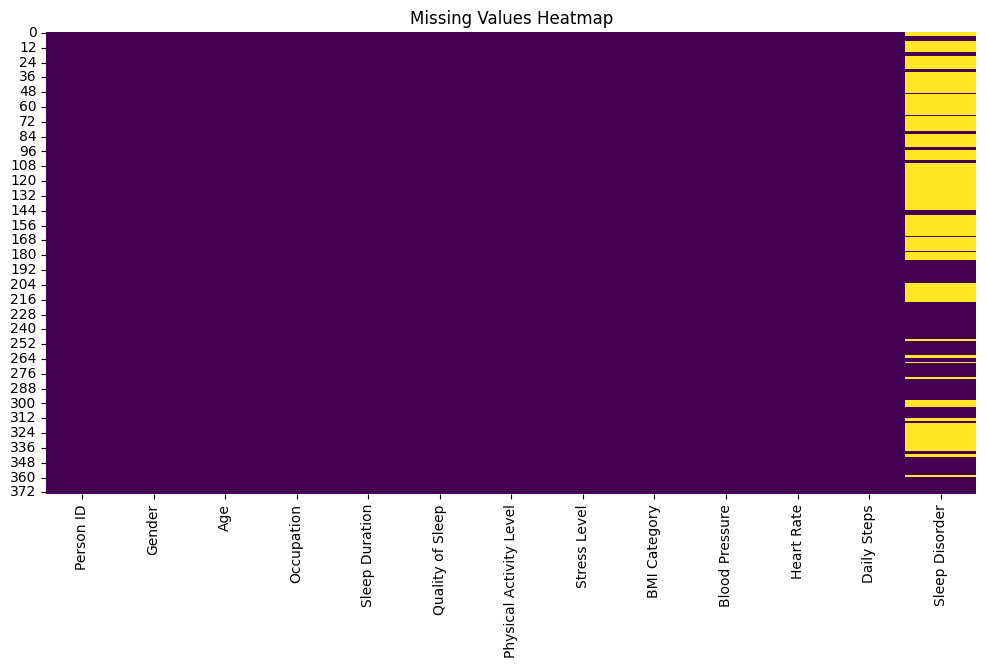

In [7]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [8]:
# Value count of Sleep disorder instances
df["Sleep Disorder"].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [9]:
# Replace values in "Sleep Disorder" column
df["Sleep Disorder"] = df["Sleep Disorder"].replace(
    {np.nan: 'No Sleep Disorder', 'Sleep Apnea': "Sleep disorder", 'Insomnia': "Sleep disorder"}
)

In [10]:
df["Sleep Disorder"].value_counts()

Sleep Disorder
No Sleep Disorder    219
Sleep disorder       155
Name: count, dtype: int64

In [11]:
# Data Description
print(df.describe())

        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000 

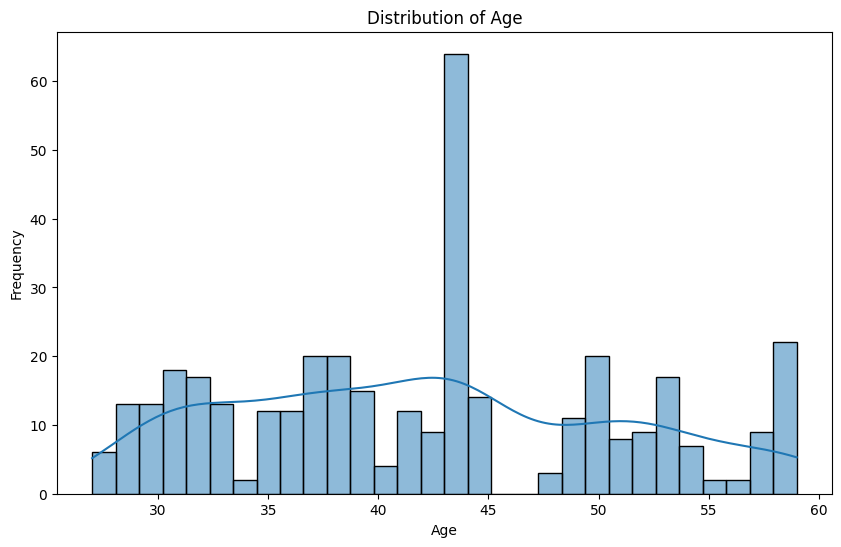

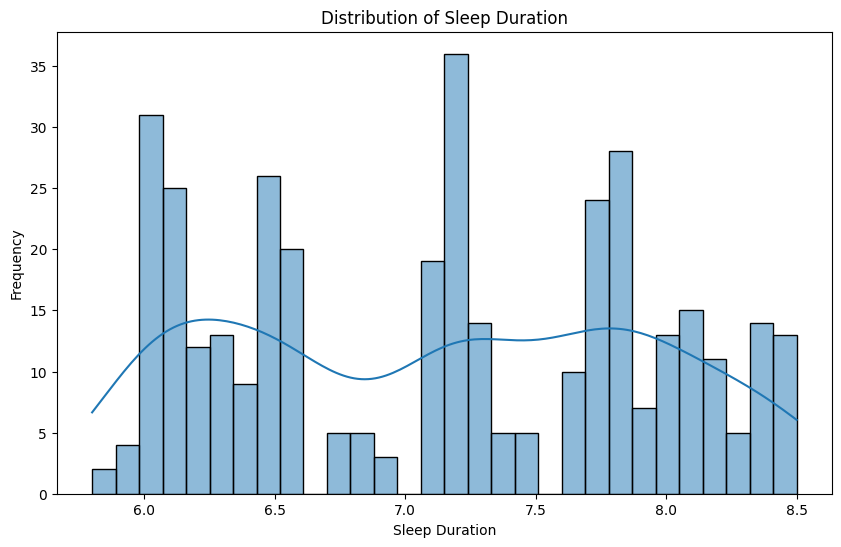

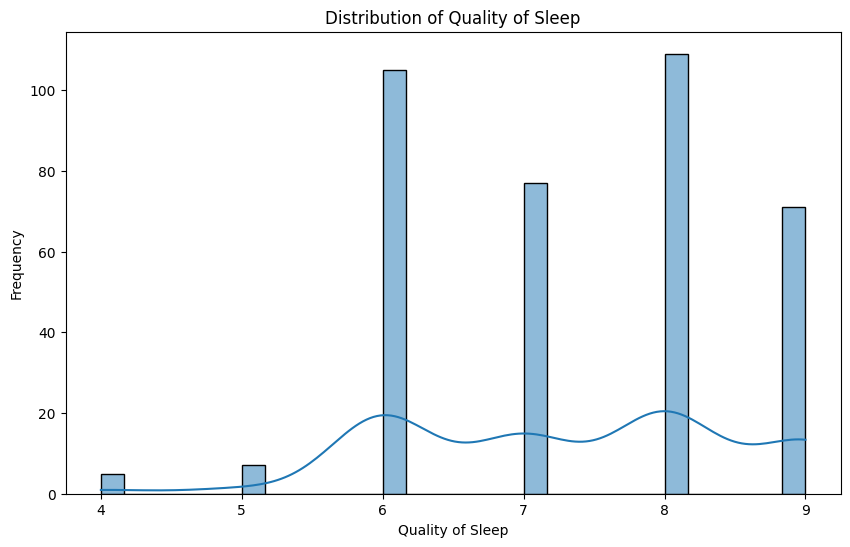

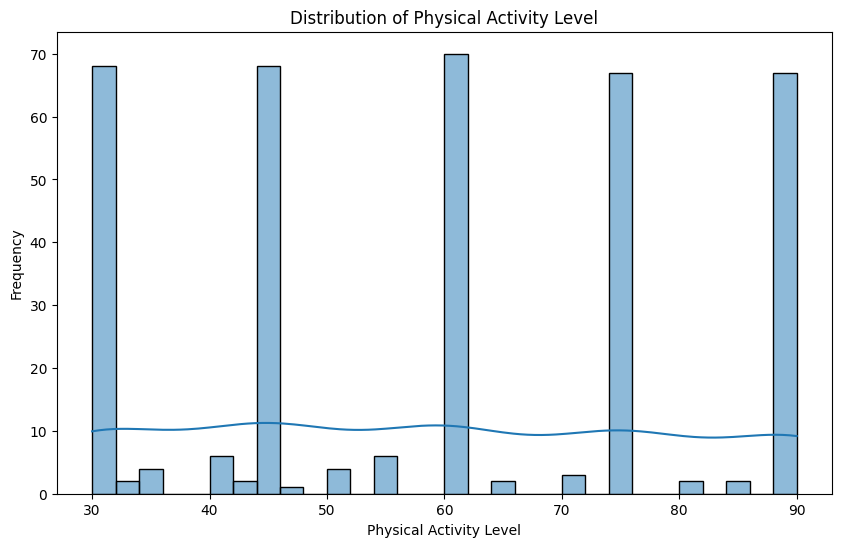

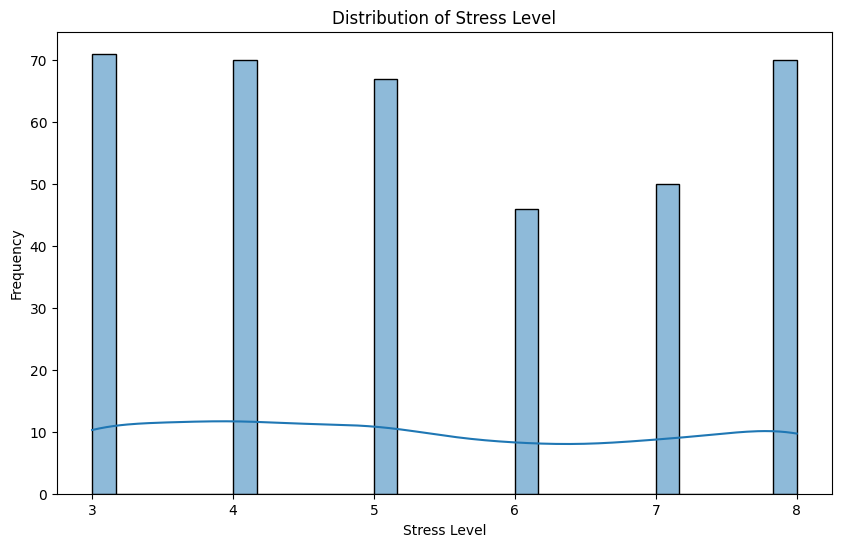

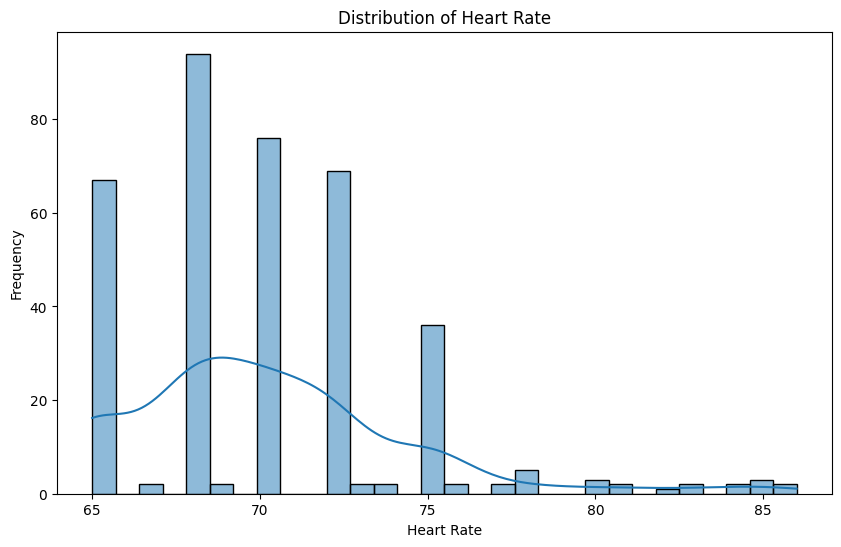

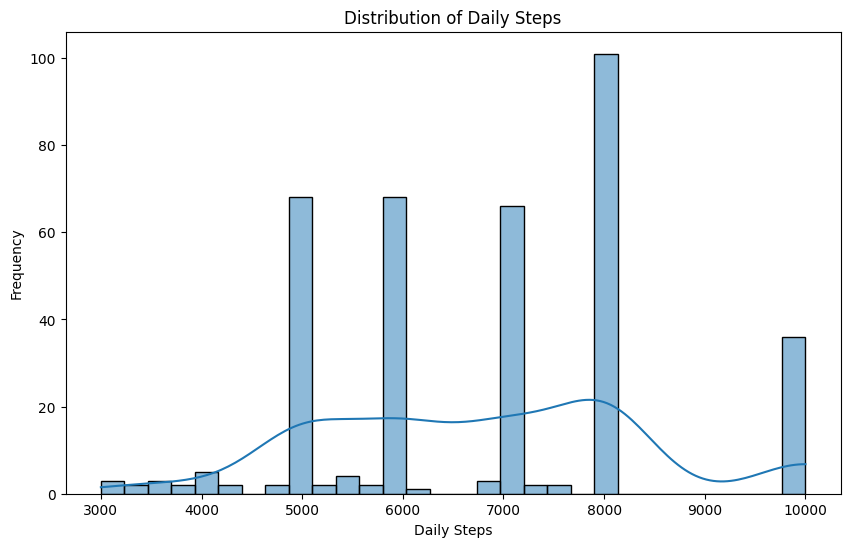

In [12]:
# Distribution plots for numerical features
numerical_features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


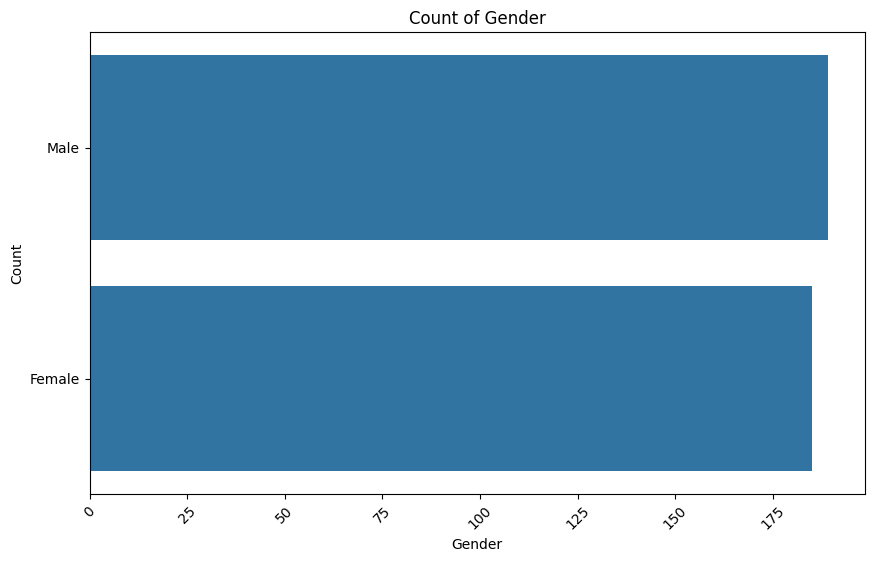

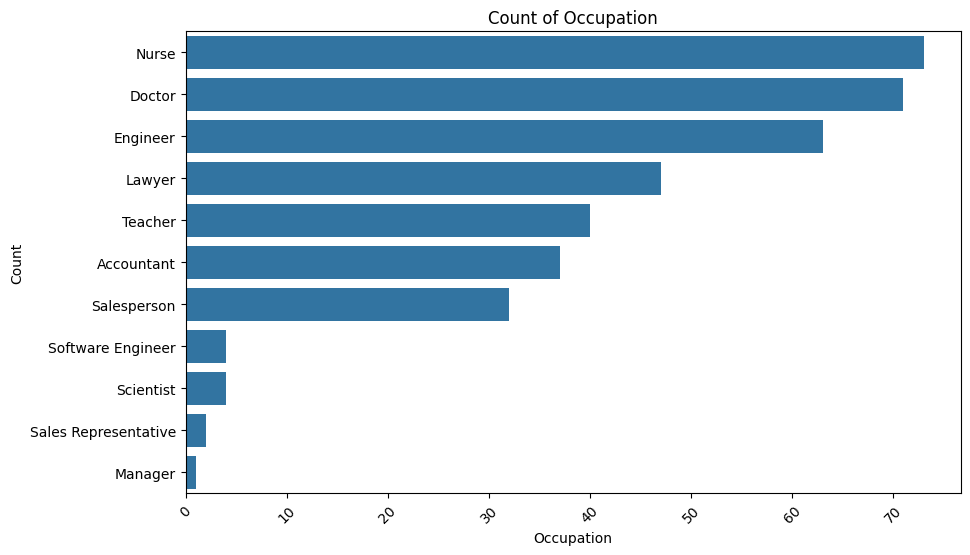

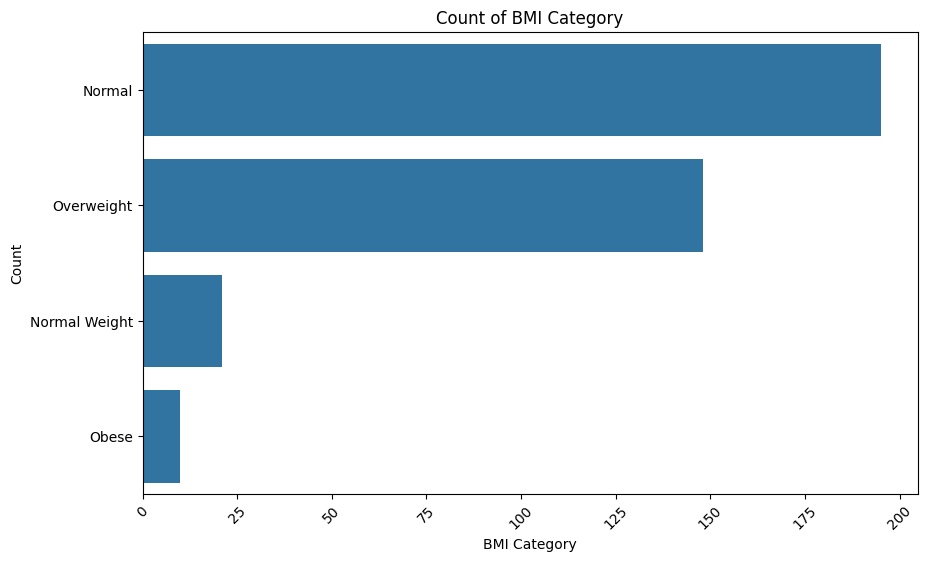

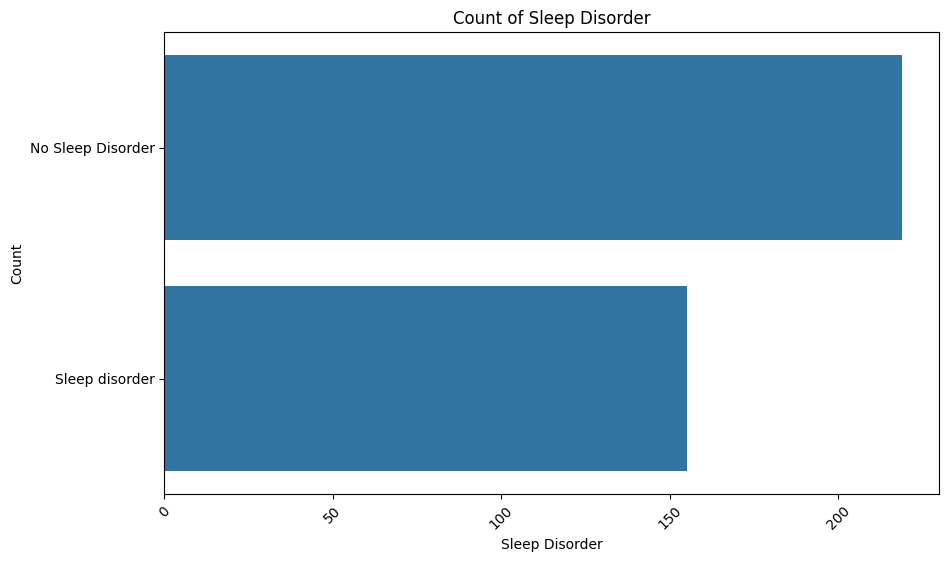

In [13]:
# Bar plots for categorical features
categorical_features = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(df[feature], order = df[feature].value_counts().index)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

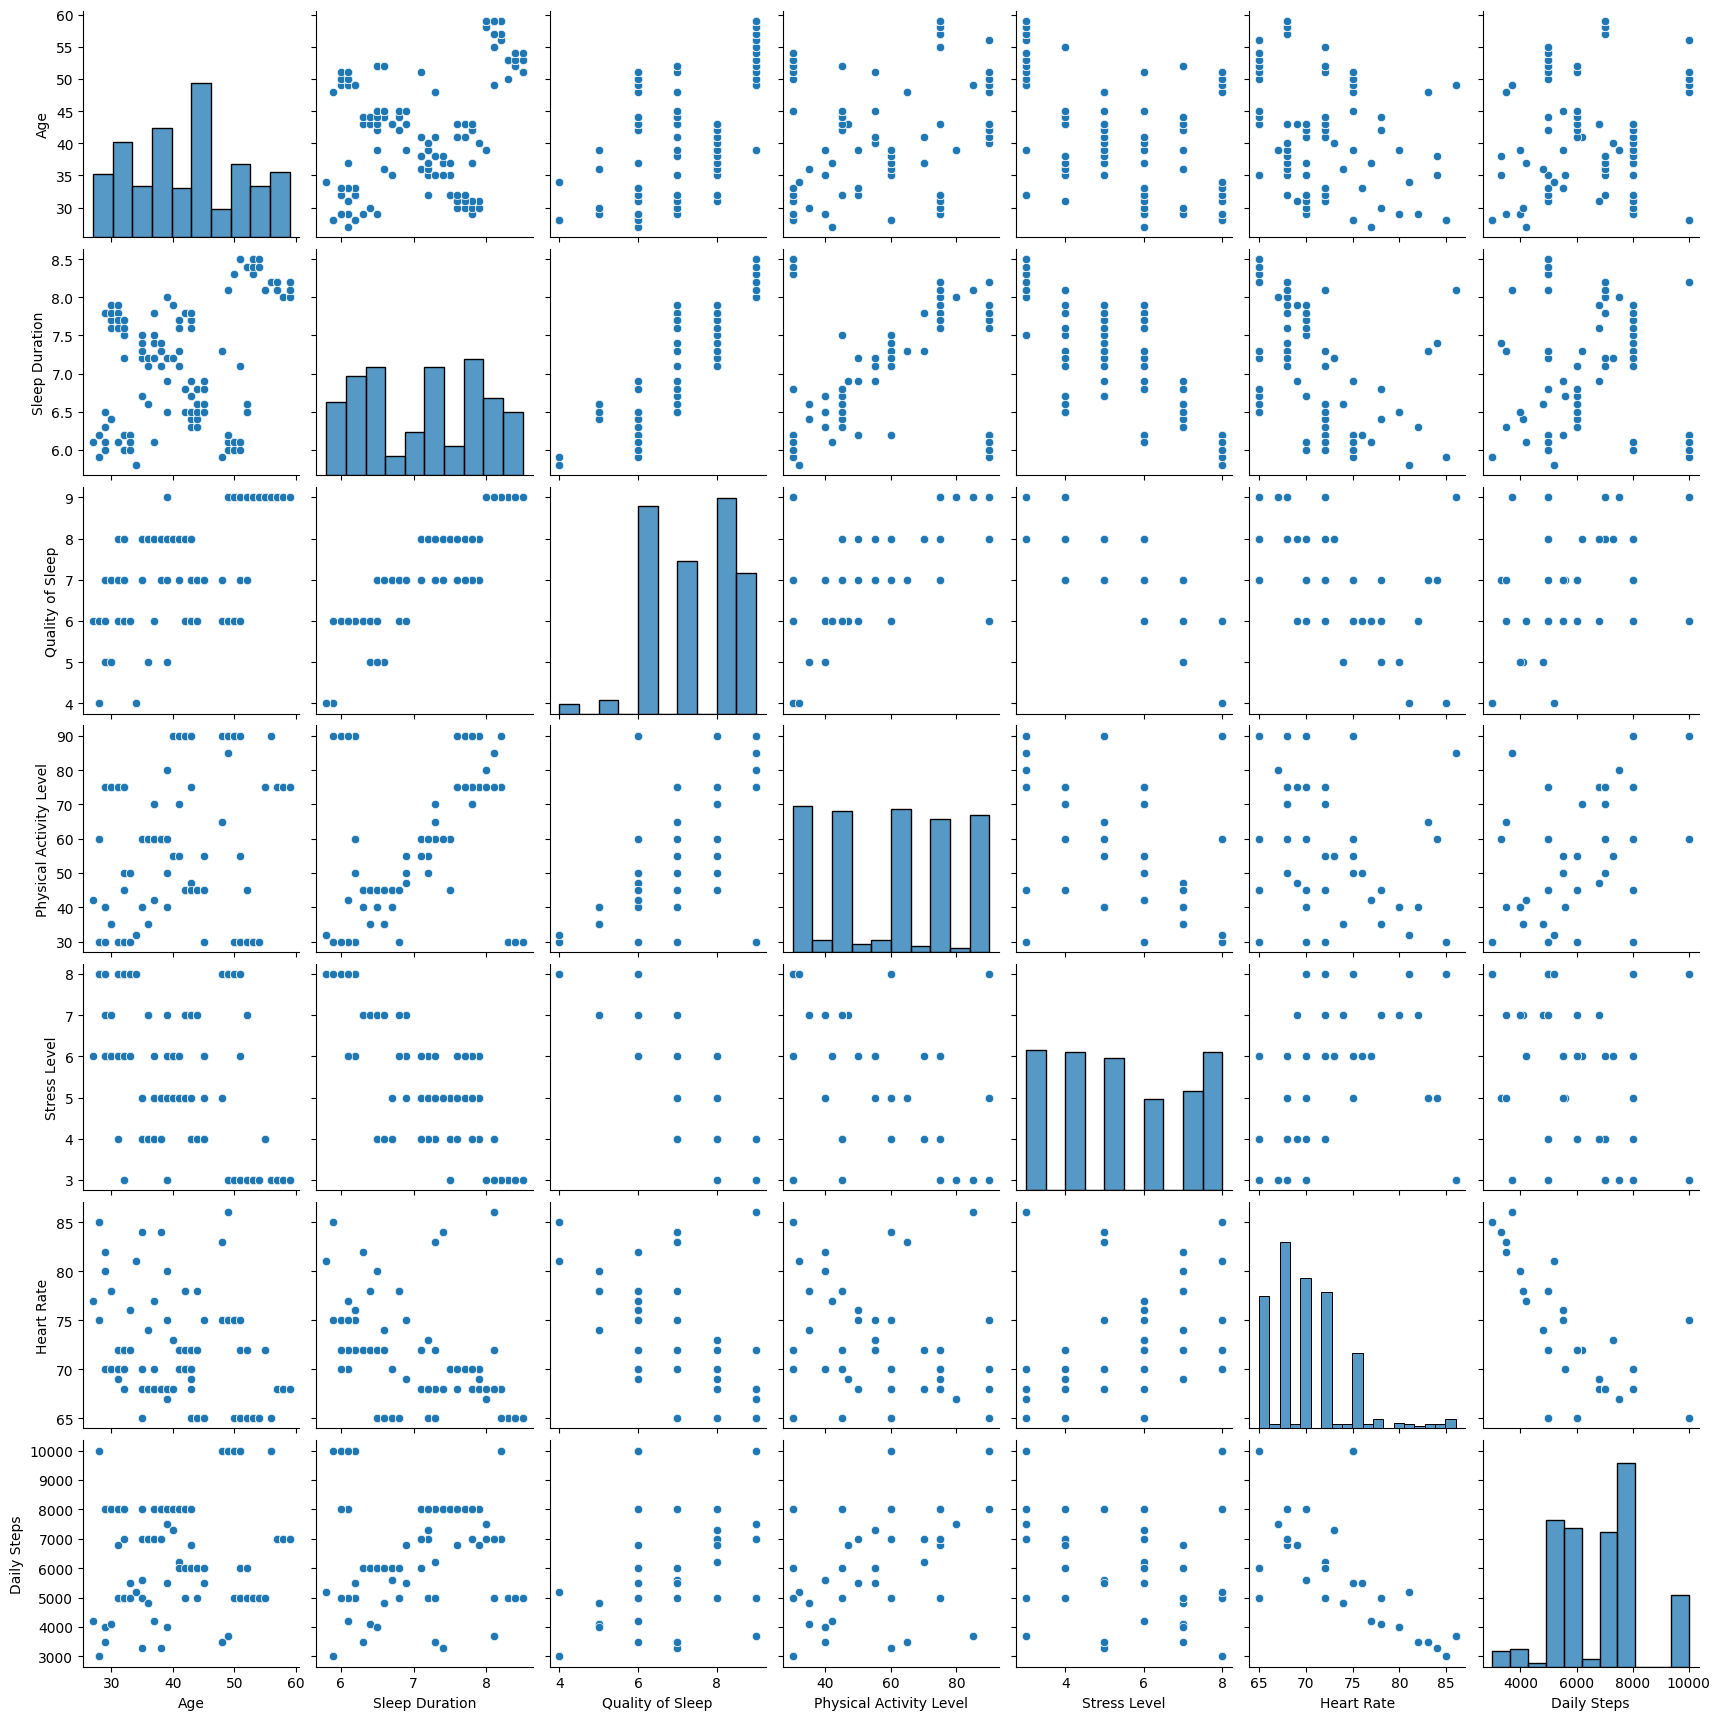

In [14]:

# Pairplot for numerical features
sns.pairplot(df[numerical_features])
plt.show()

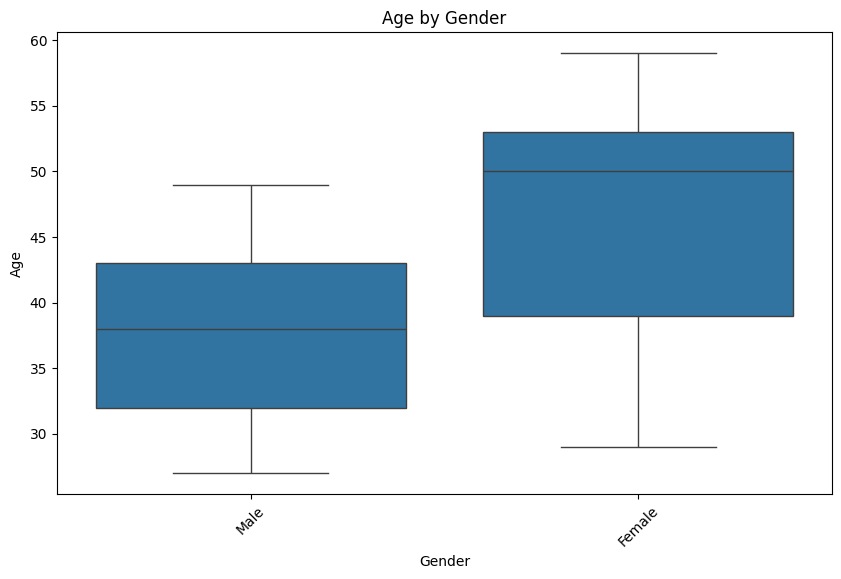

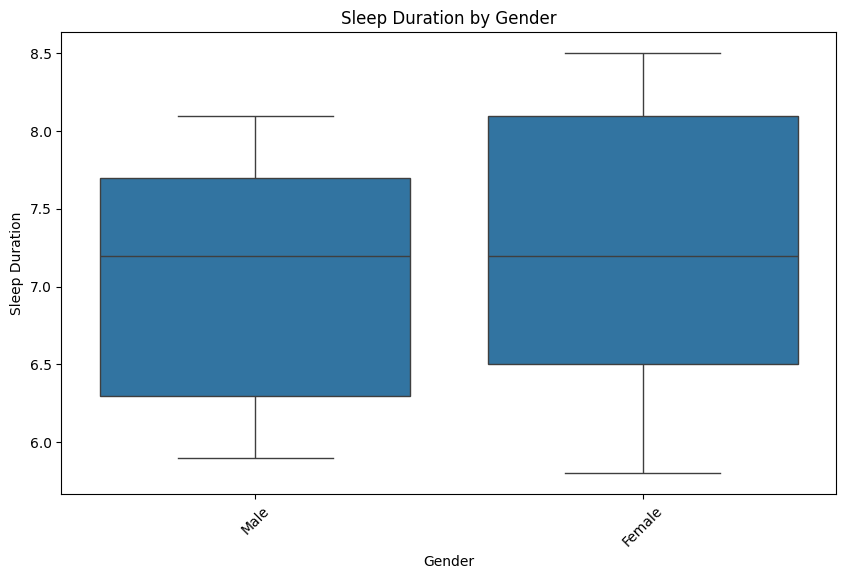

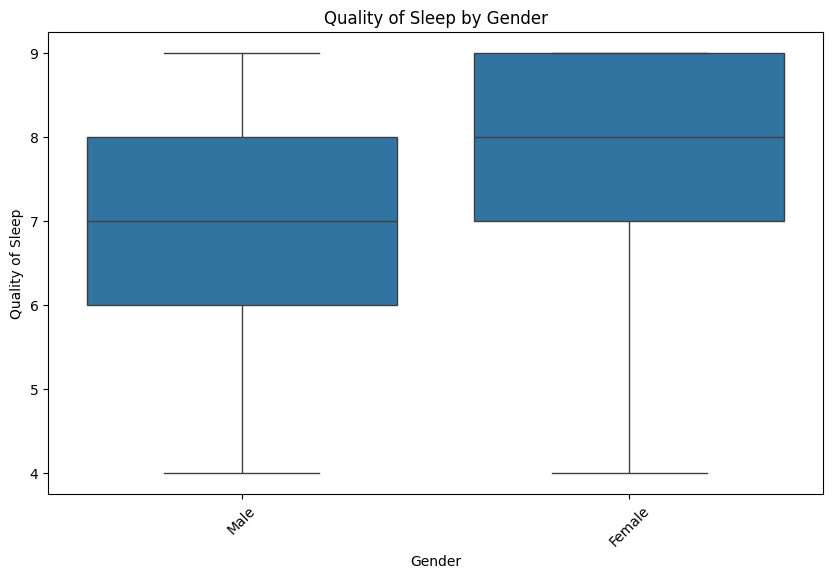

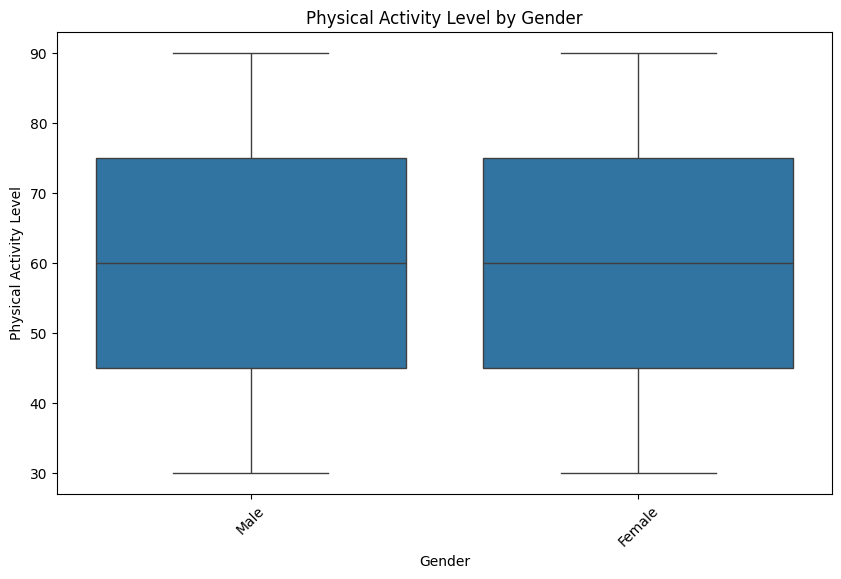

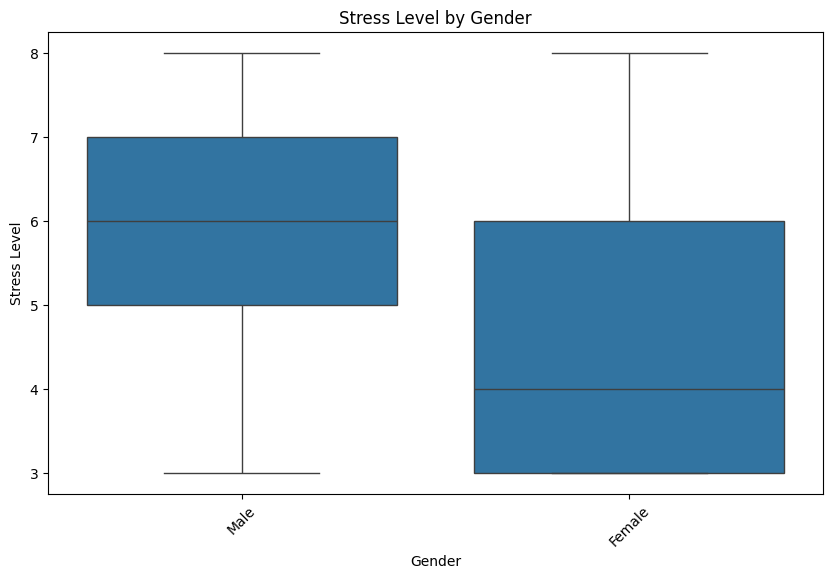

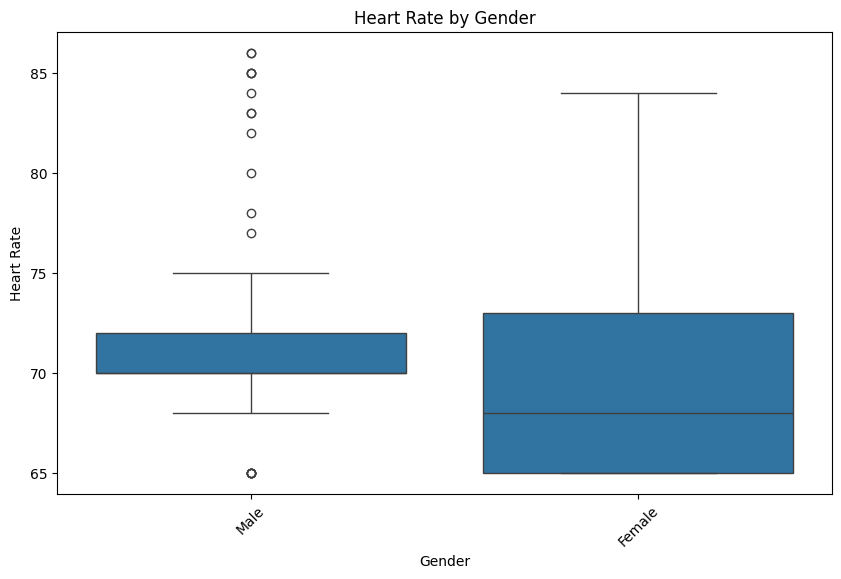

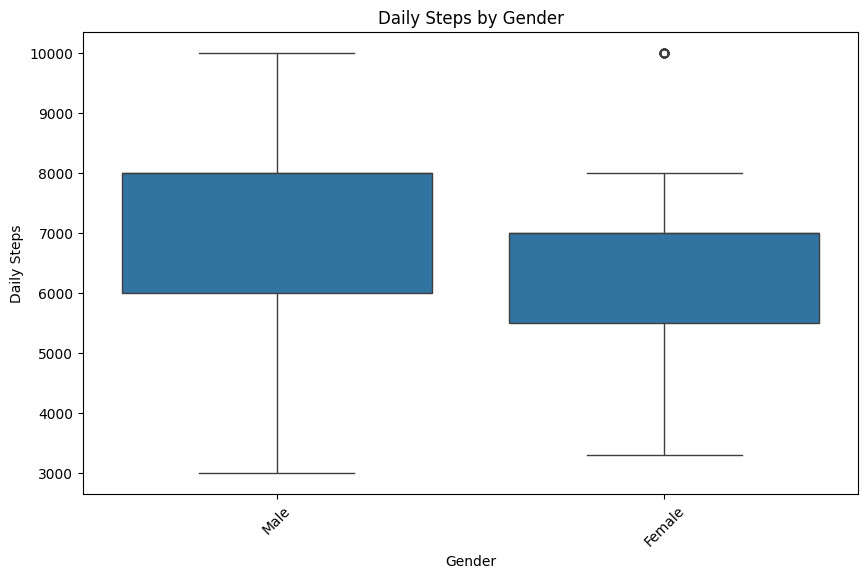

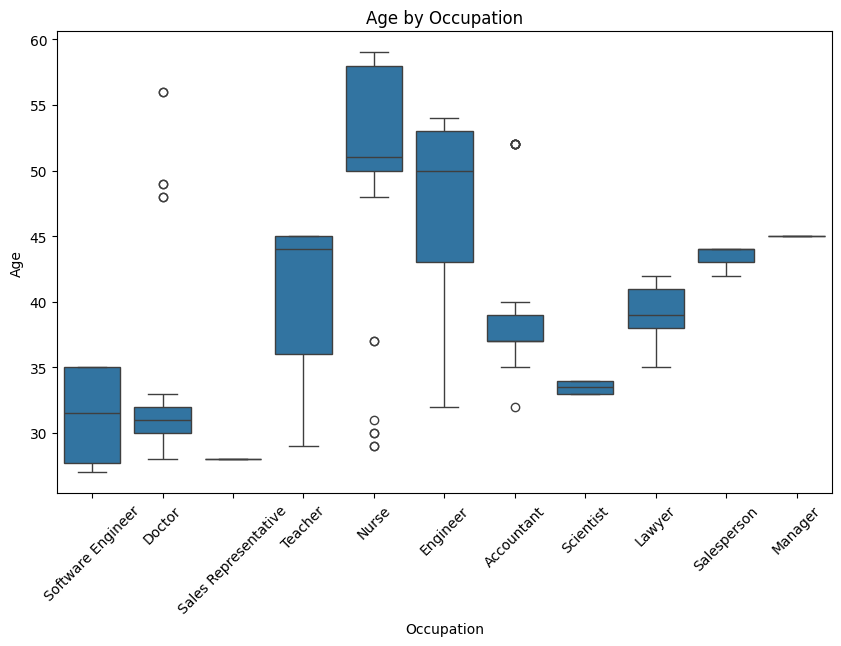

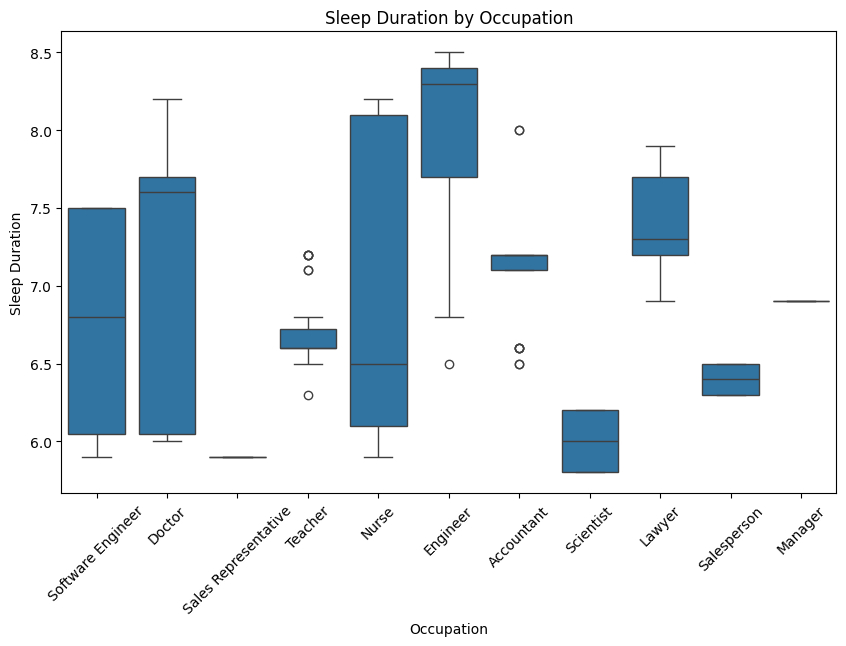

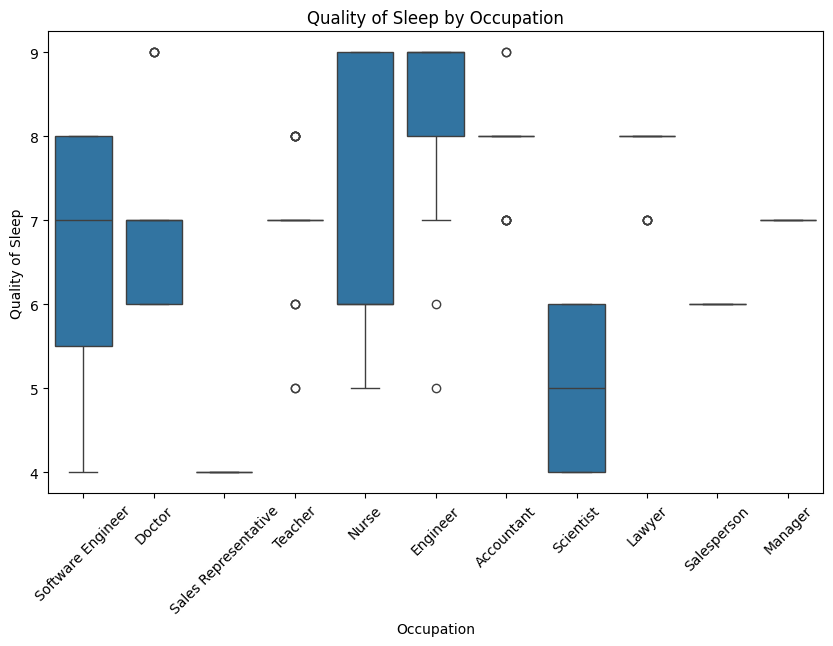

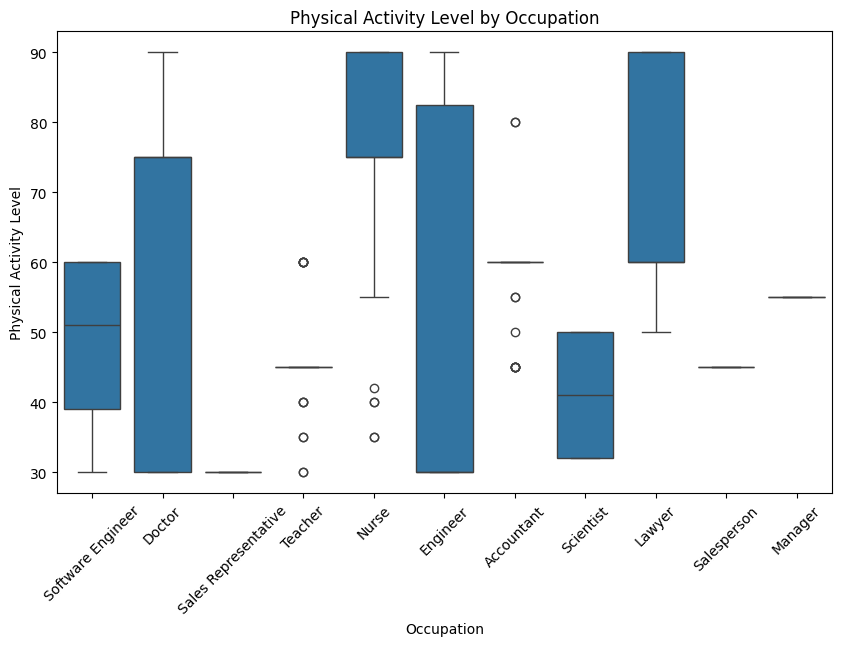

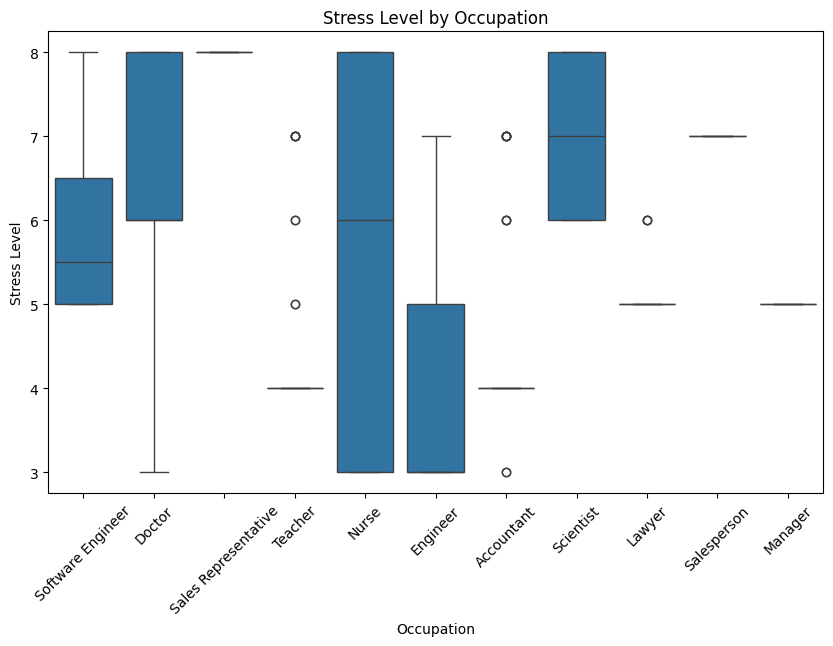

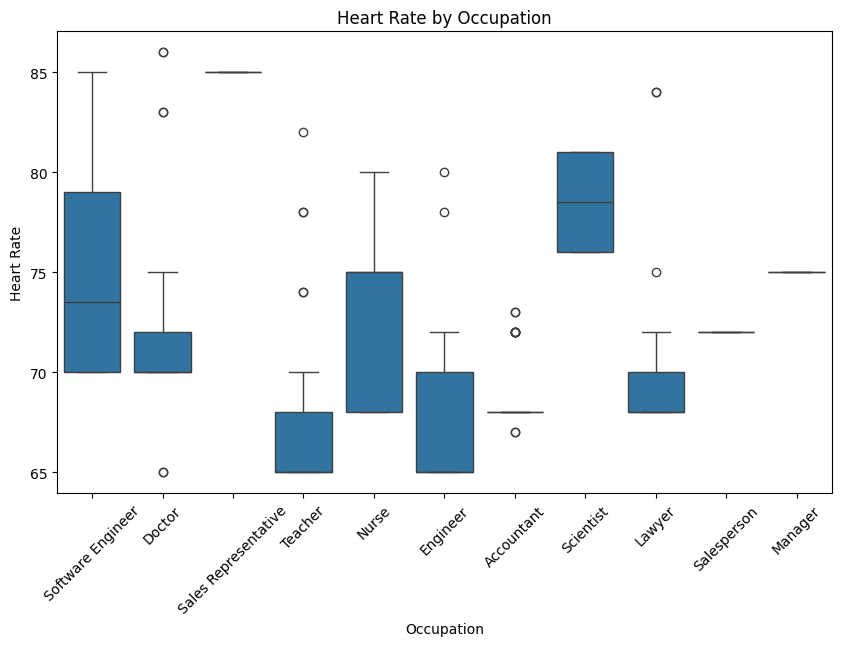

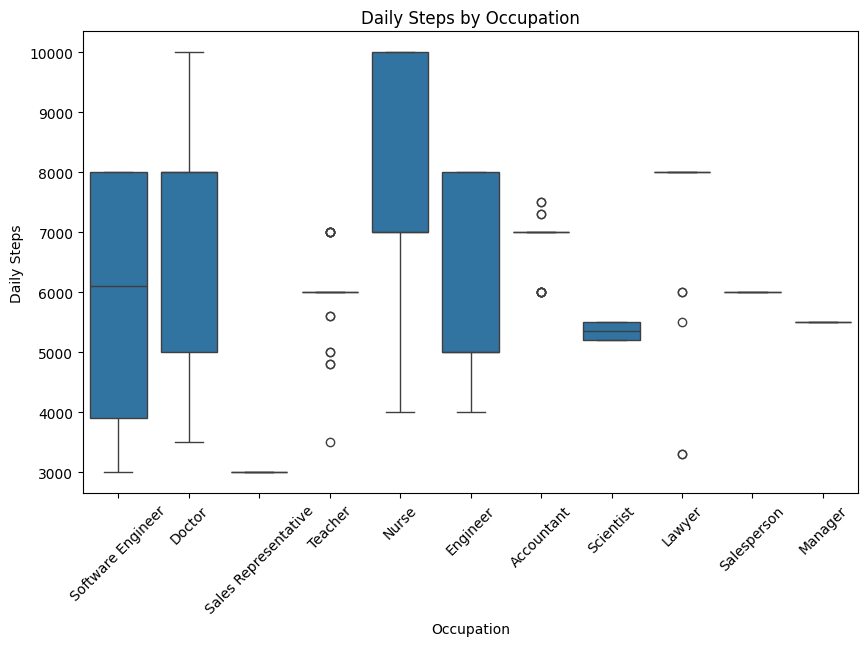

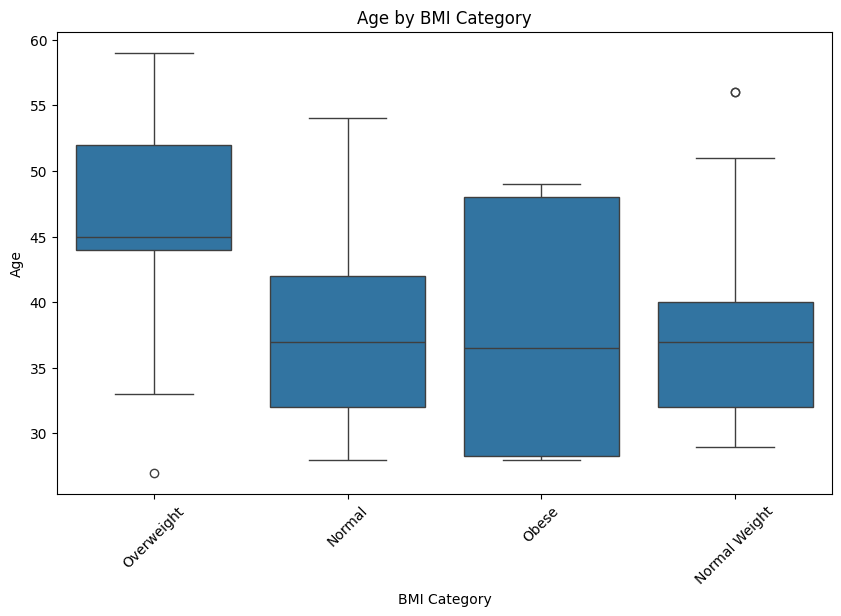

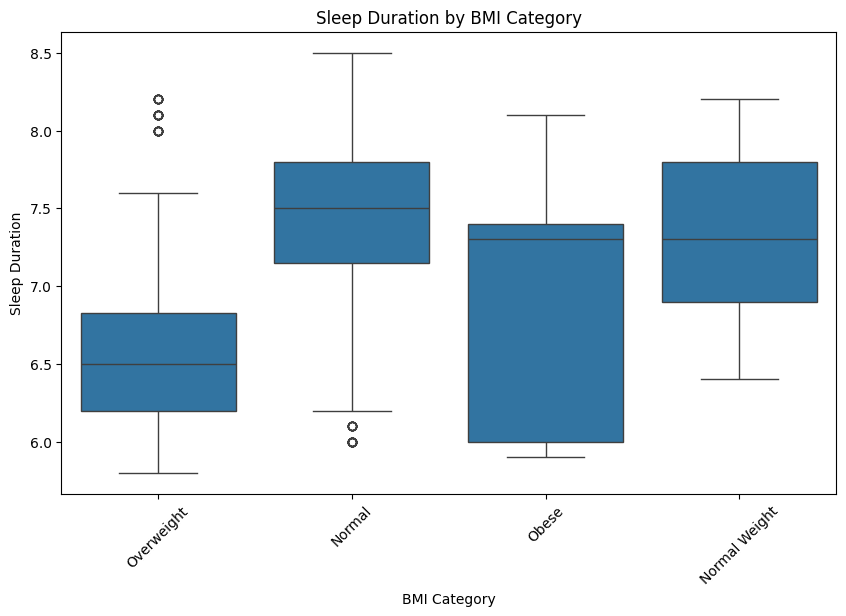

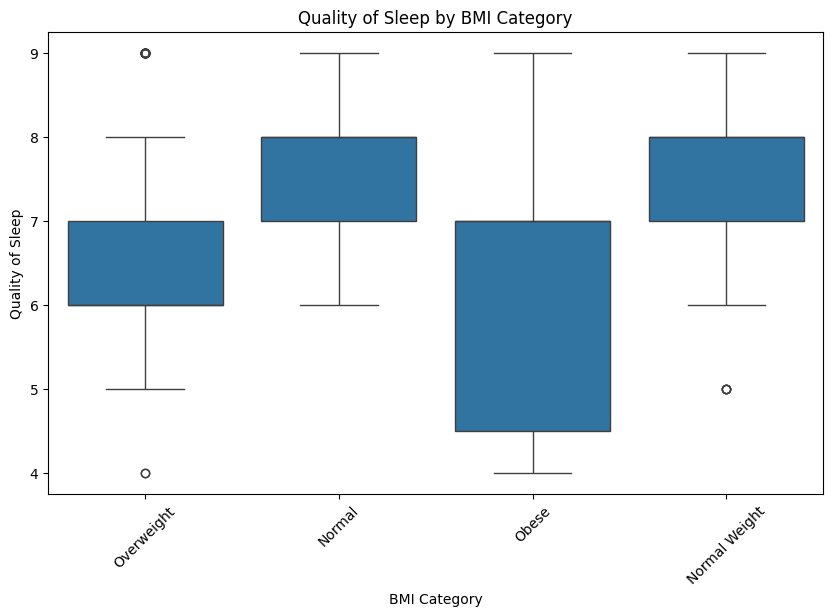

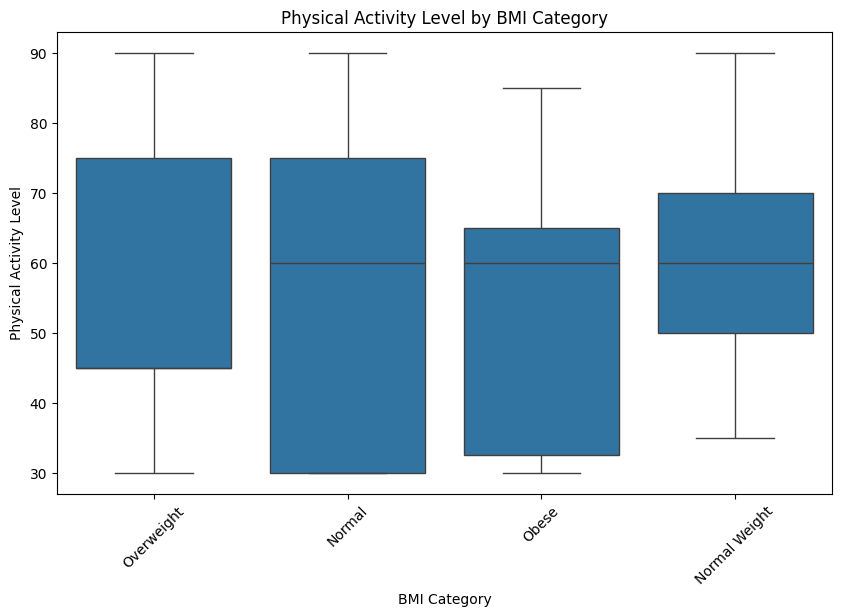

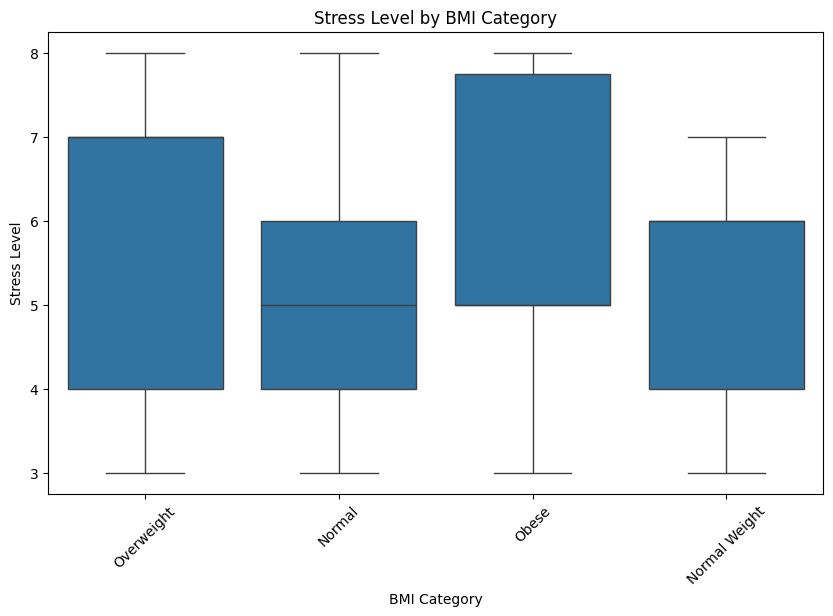

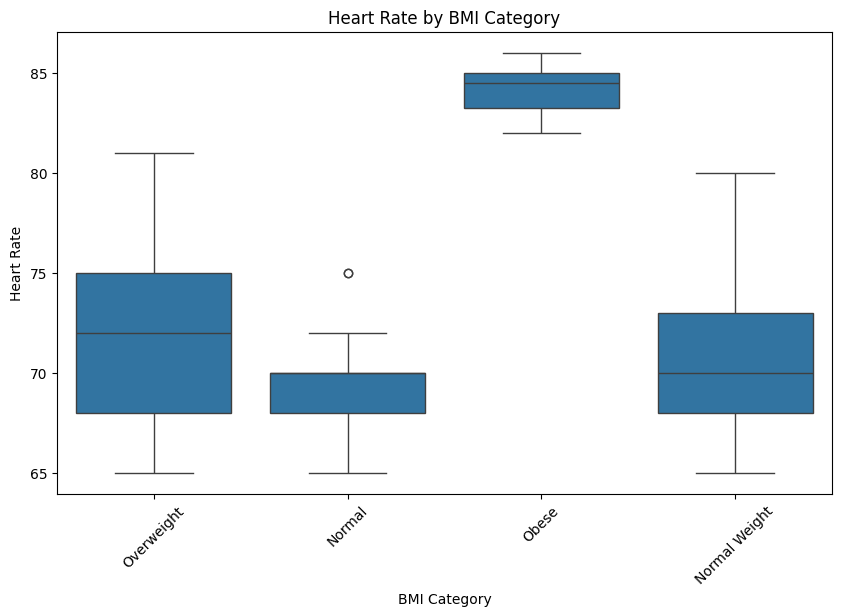

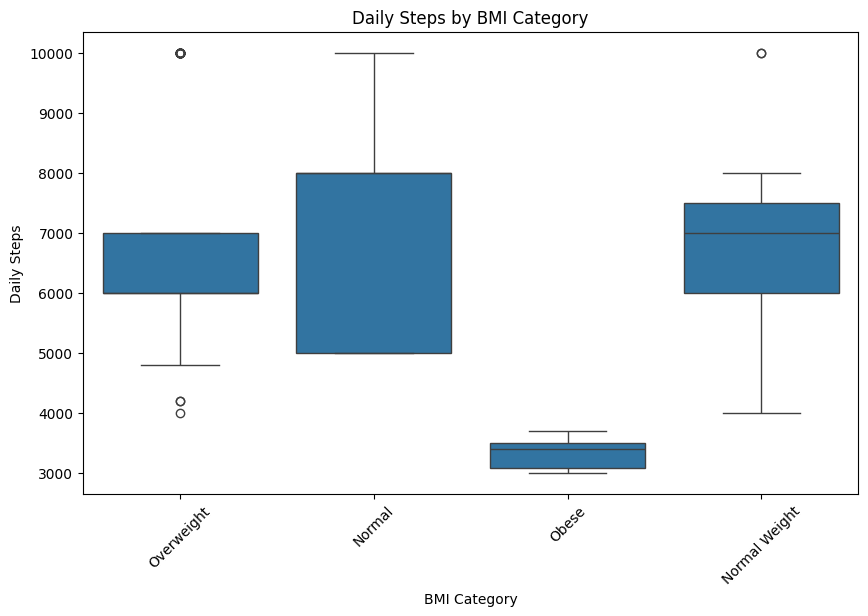

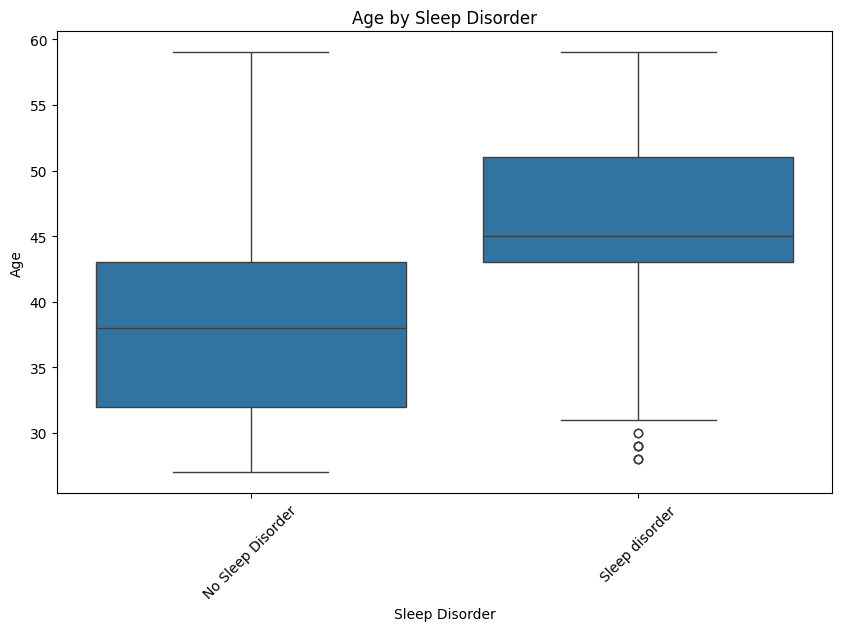

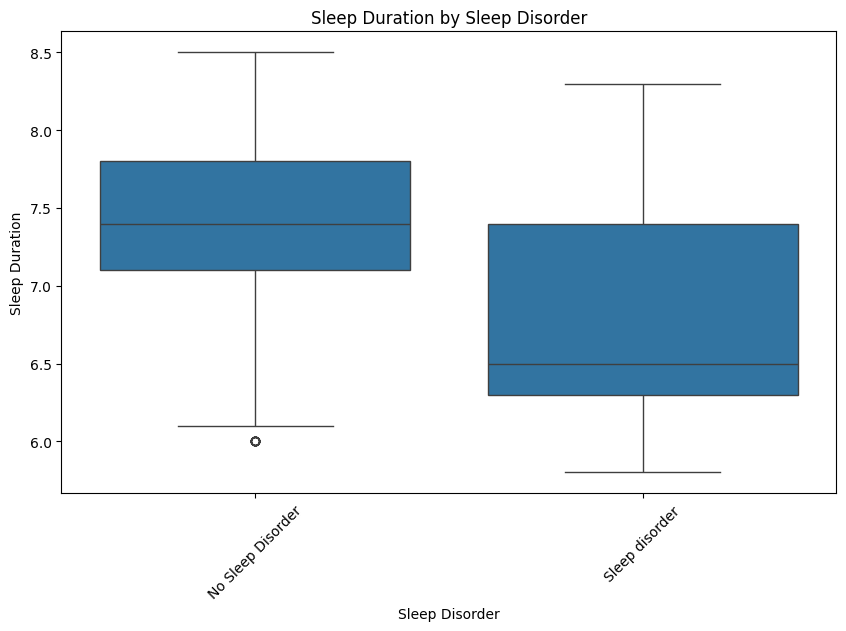

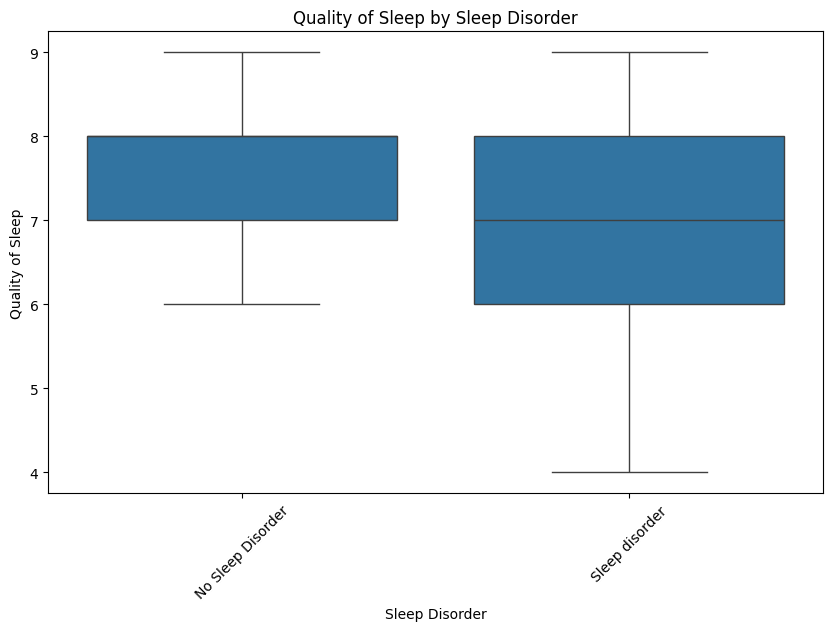

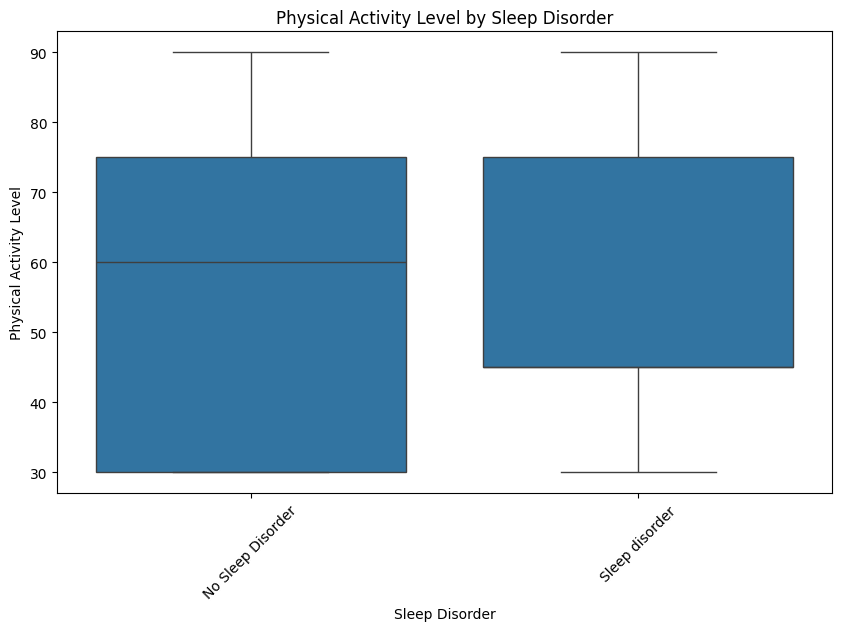

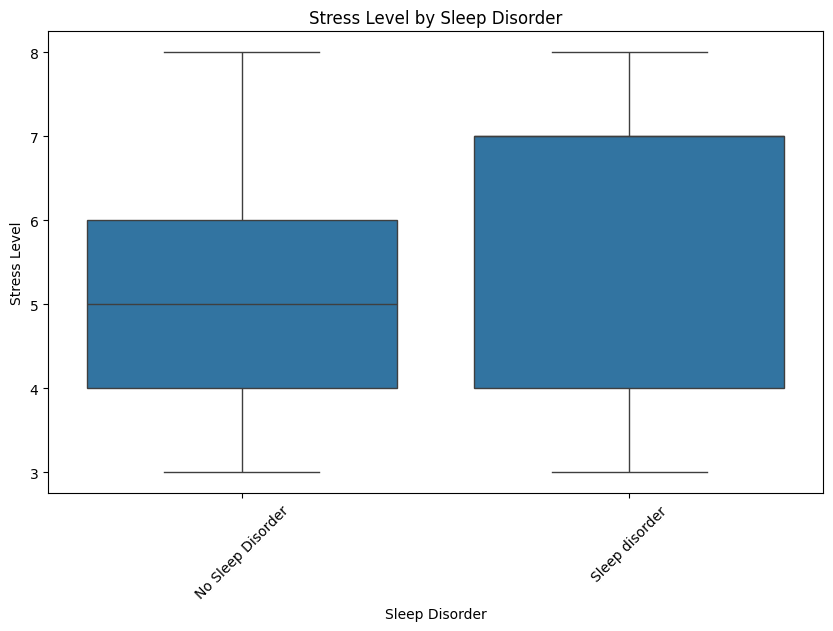

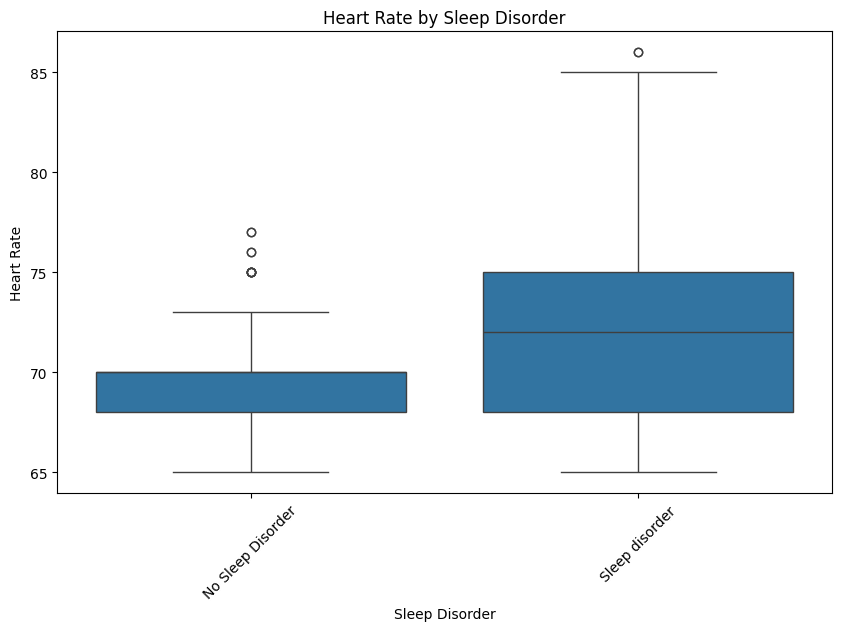

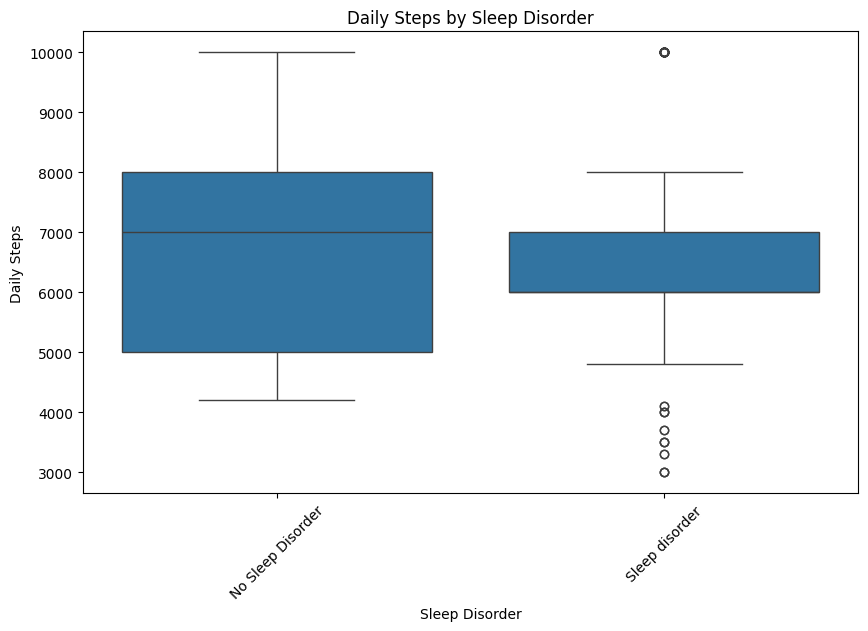

In [15]:
# Box plots to examine relationships between categorical and numerical features
for feature in categorical_features:
    for num_feature in numerical_features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=feature, y=num_feature, data=df)
        plt.title(f'{num_feature} by {feature}')
        plt.xlabel(feature)
        plt.ylabel(num_feature)
        plt.xticks(rotation=45)
        plt.show()


In [16]:
# Skewness and Kurtosis
print("Skewness:")
print(df[numerical_features].apply(lambda x: skew(x.dropna())))
print("\nKurtosis:")
print(df[numerical_features].apply(lambda x: kurtosis(x.dropna())))

Skewness:
Age                        0.256189
Sleep Duration             0.037404
Quality of Sleep          -0.206615
Physical Activity Level    0.074188
Stress Level               0.153710
Heart Rate                 1.219906
Daily Steps                0.177562
dtype: float64

Kurtosis:
Age                       -0.913662
Sleep Duration            -1.285371
Quality of Sleep          -0.754309
Physical Activity Level   -1.265205
Stress Level              -1.325628
Heart Rate                 2.240001
Daily Steps               -0.404782
dtype: float64


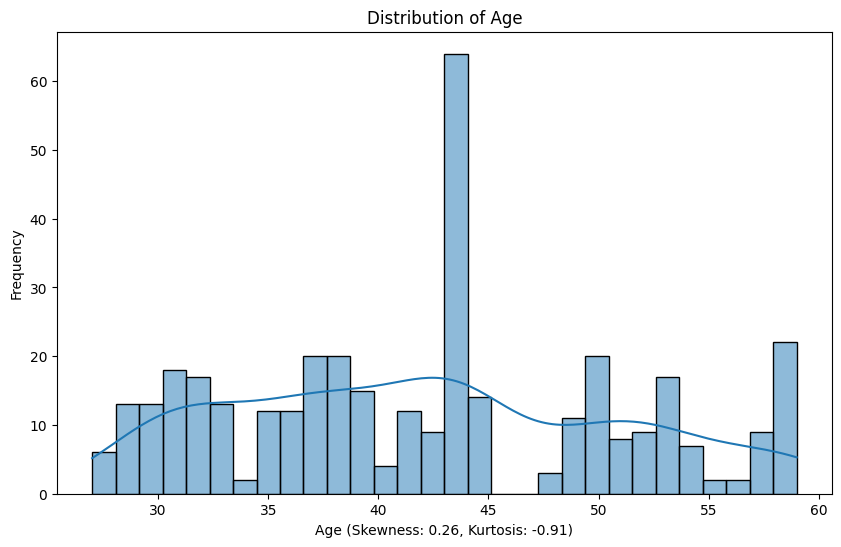

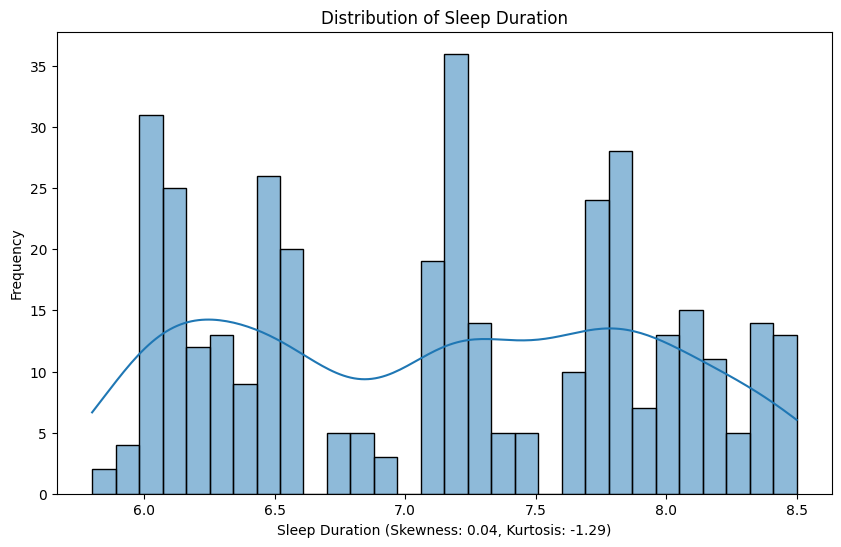

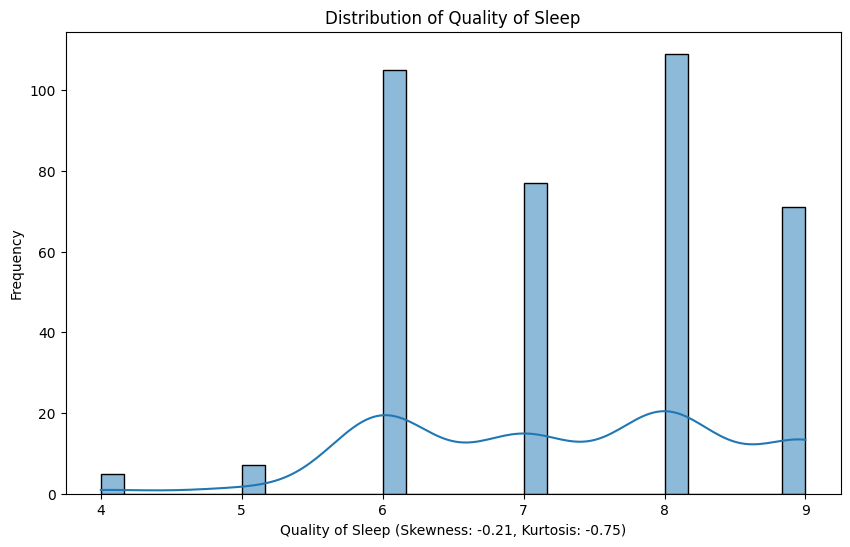

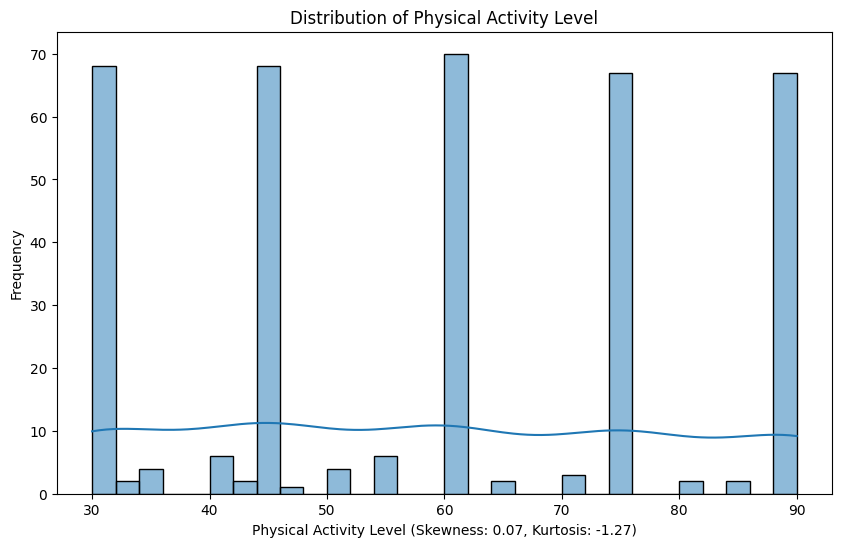

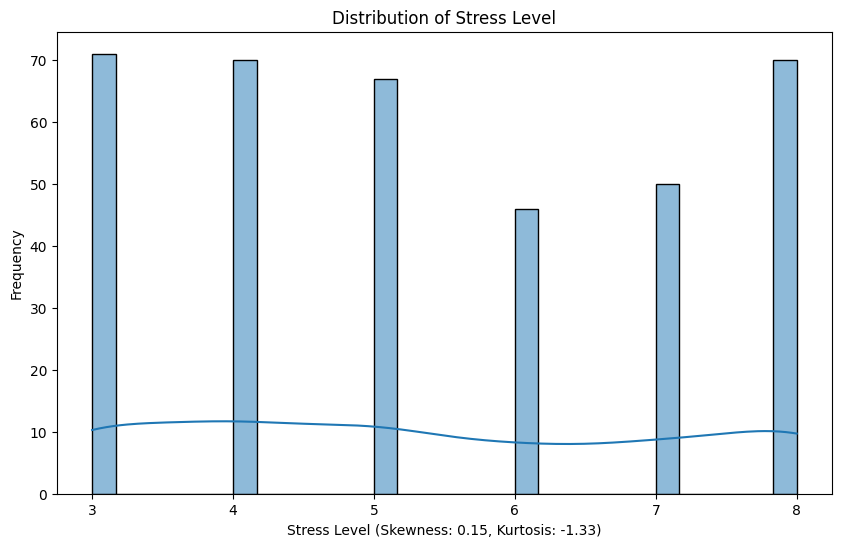

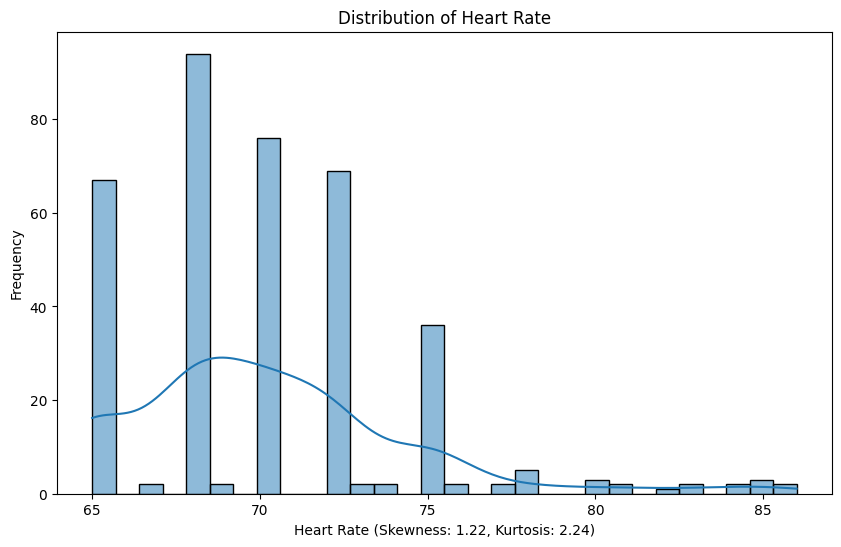

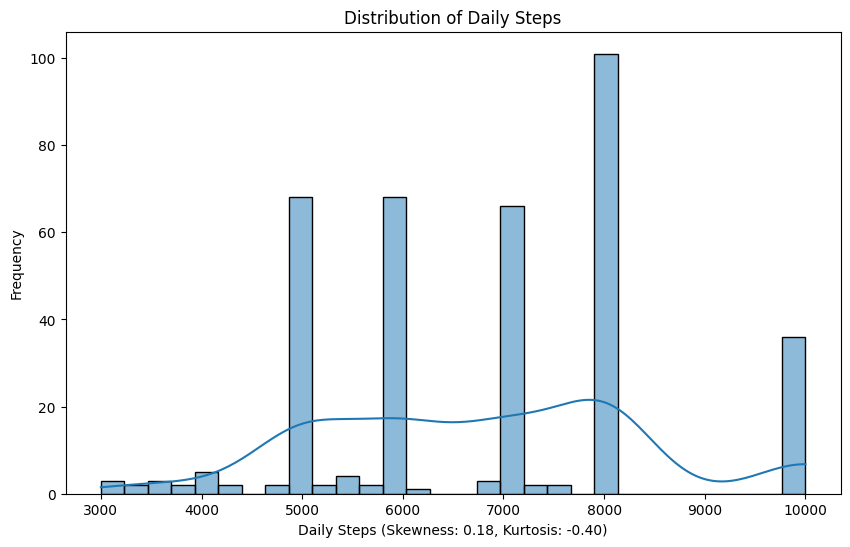

In [17]:
# Distribution plots for numerical features with skewness and kurtosis
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(f'{feature} (Skewness: {skew(df[feature]):.2f}, Kurtosis: {kurtosis(df[feature]):.2f})')
    plt.ylabel('Frequency')
    plt.show()

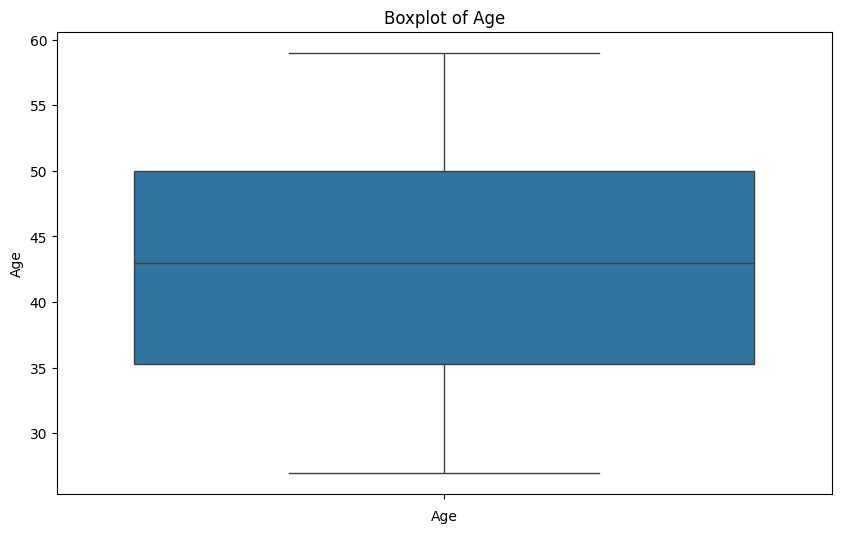

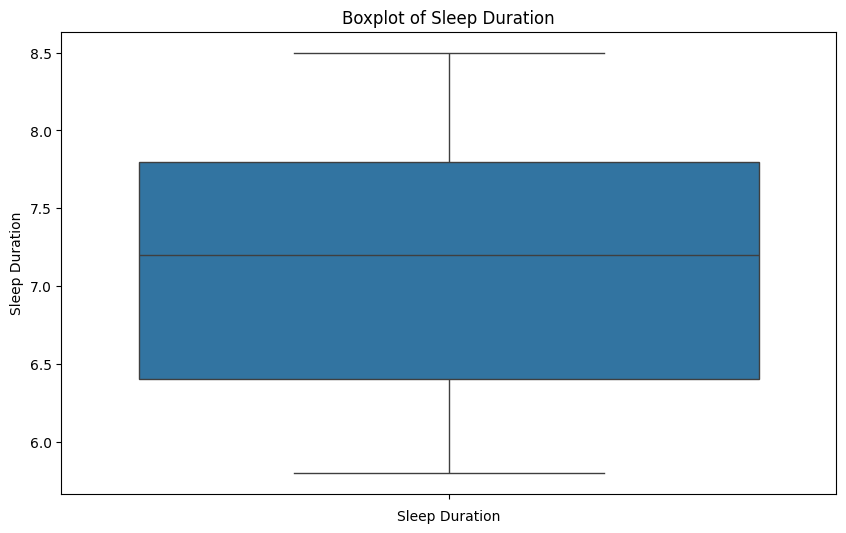

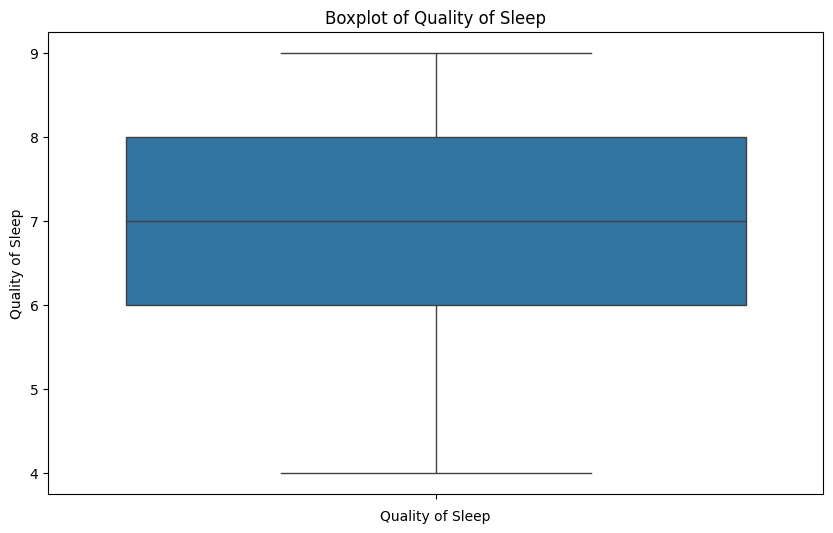

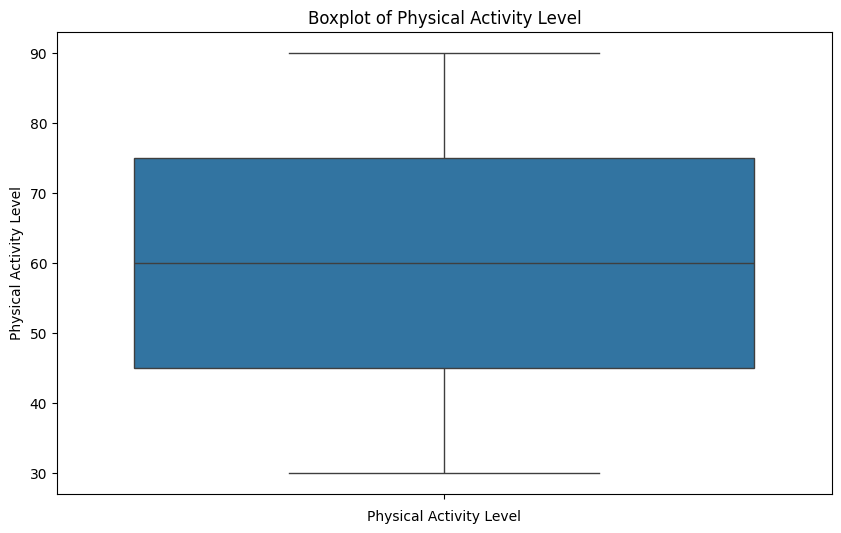

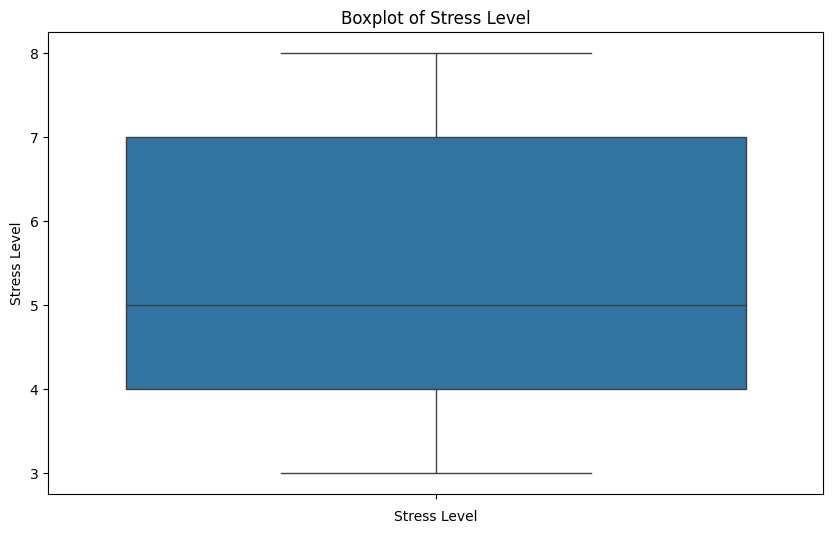

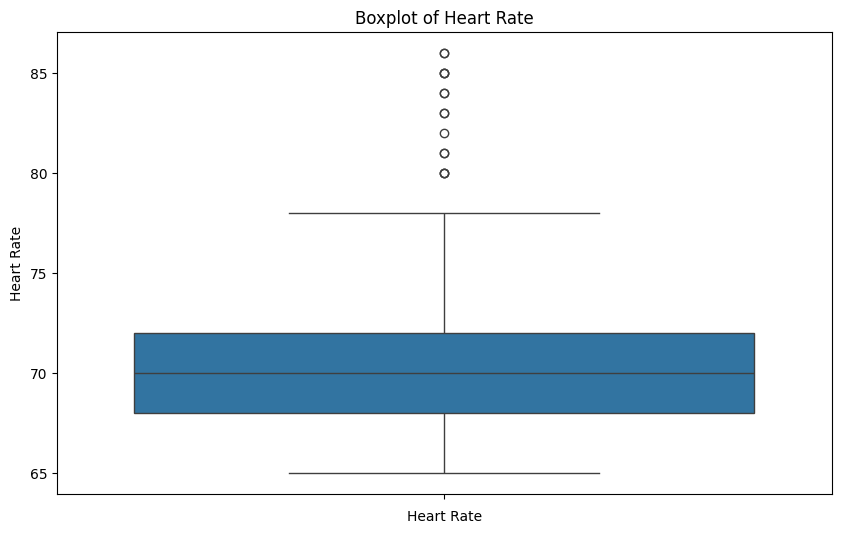

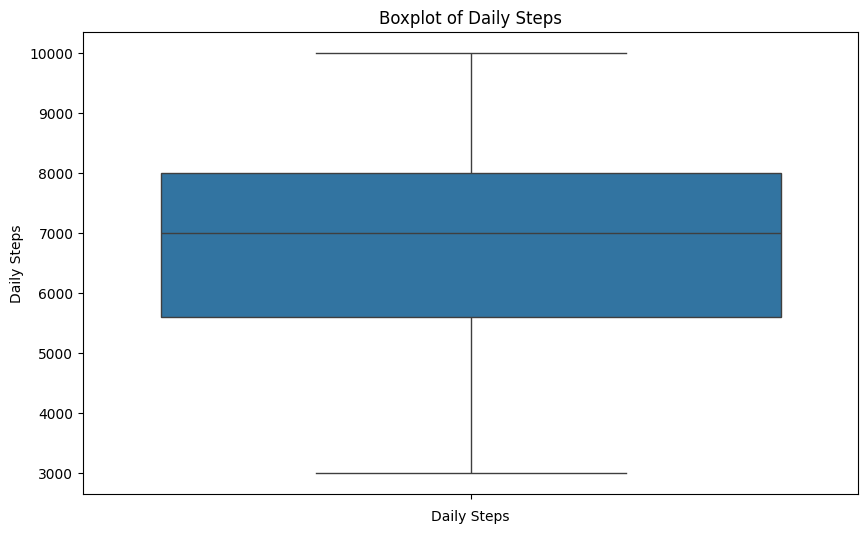

In [18]:
# Outlier detection using box plots
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

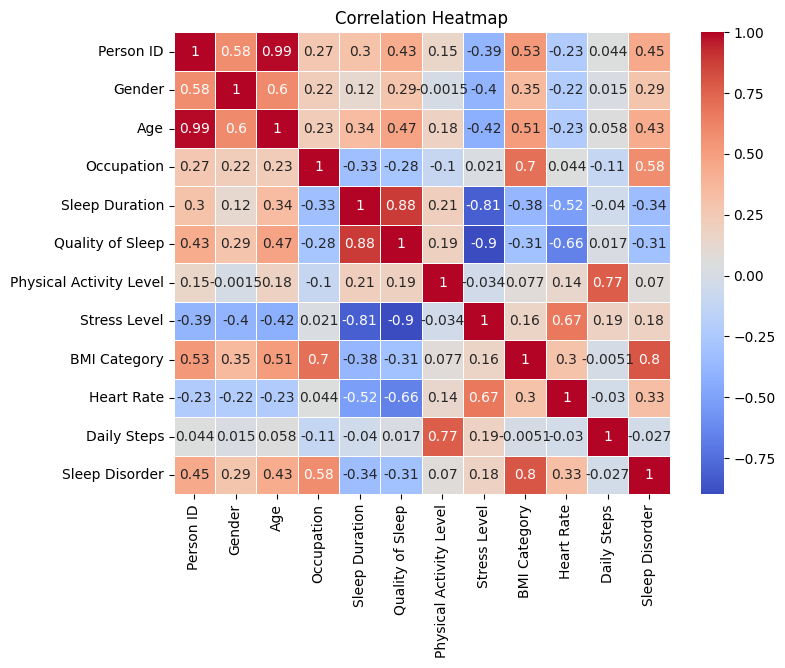

In [19]:
# Convert categorical data to numerical for correlation calculation
data_numeric = df.copy()
data_numeric['Gender'] = data_numeric['Gender'].map({'Male': 0, 'Female': 1})
data_numeric['Occupation'] = data_numeric['Occupation'].astype('category').cat.codes
data_numeric['BMI Category'] = data_numeric['BMI Category'].astype('category').cat.codes
data_numeric['Sleep Disorder'] = data_numeric['Sleep Disorder'].astype('category').cat.codes

# Calculate correlation matrix
corr_matrix = data_numeric.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [20]:
# Drop Person_ID column
df.drop(["Person ID"],axis=1,inplace=True)

In [21]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [22]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,27,9,6.1,6,42,6,3,11,77,4200,0
1,1,28,1,6.2,6,60,8,0,9,75,10000,0
2,1,28,1,6.2,6,60,8,0,9,75,10000,0
3,1,28,6,5.9,4,30,8,2,22,85,3000,1
4,1,28,6,5.9,4,30,8,2,22,85,3000,1


In [23]:
# Define features and target
X = df.drop(columns='Sleep Disorder')
y = df['Sleep Disorder']

In [25]:
X

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,27,9,6.1,6,42,6,3,11,77,4200
1,1,28,1,6.2,6,60,8,0,9,75,10000
2,1,28,1,6.2,6,60,8,0,9,75,10000
3,1,28,6,5.9,4,30,8,2,22,85,3000
4,1,28,6,5.9,4,30,8,2,22,85,3000
...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,5,8.1,9,75,3,3,23,68,7000
370,0,59,5,8.0,9,75,3,3,23,68,7000
371,0,59,5,8.1,9,75,3,3,23,68,7000
372,0,59,5,8.1,9,75,3,3,23,68,7000


In [26]:
y

0      0
1      0
2      0
3      1
4      1
      ..
369    1
370    1
371    1
372    1
373    1
Name: Sleep Disorder, Length: 374, dtype: int32

In [27]:
# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

In [28]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350, 11), (88, 11), (350,), (88,))

In [29]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
X_train

array([[-0.92295821,  0.60894064,  0.28428406, ...,  1.29798474,
         1.03017978,  1.96544022],
       [-0.92295821,  1.94024186,  0.28428406, ...,  1.29798474,
        -0.55920338,  0.13937406],
       [-0.92295821, -1.56955228,  0.28428406, ...,  0.29733571,
         1.711344  , -1.62582322],
       ...,
       [-0.92295821,  1.6981871 ,  0.28428406, ...,  1.29798474,
        -0.55920338,  0.13937406],
       [-0.92295821,  0.24585849,  1.88911341, ...,  0.86913516,
        -1.2403676 , -0.46931465],
       [-0.92295821, -0.84338797,  1.88911341, ..., -1.98986207,
        -0.55920338,  0.13937406]])

In [31]:
X_test

array([[-0.92295821,  1.94024186,  0.28428406,  1.15509573,  1.43686026,
         0.77030963, -1.35650631,  1.01973563,  1.29798474, -0.55920338,
         0.13937406],
       [ 1.08347268, -1.20647012, -0.99957943, -1.39536934, -1.00046328,
        -1.43557705,  1.46618815, -1.06744256, -0.70331332,  0.34901557,
        -1.07800337],
       [-0.92295821,  0.85099541,  0.28428406, -1.26784608, -1.00046328,
         1.50560519,  1.46618815,  1.01973563,  1.29798474,  1.03017978,
         1.96544022],
       [-0.92295821,  0.00380372,  1.88911341, -0.50270656, -0.1880221 ,
        -0.70028149, -0.79196742,  1.01973563,  0.86913516, -1.2403676 ,
        -0.46931465],
       [-0.92295821,  0.72996802,  0.28428406, -1.20299149, -1.00046328,
         1.50560519,  1.46618815,  1.01973563,  1.29798474,  1.03017978,
         1.96544022],
       [-0.92295821,  0.85099541,  0.28428406, -1.39536934, -1.00046328,
         1.50560519,  1.46618815,  1.01973563,  1.29798474,  1.03017978,
         1.965

In [32]:
# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [34]:
# Feature selection
k_best = SelectKBest(score_func=f_classif, k=10)  
X_train_k_best = k_best.fit_transform(X_train, y_train)
X_test_k_best = k_best.transform(X_test)

In [35]:
# Get the selected features and their scores
selected_features = X.columns[k_best.get_support()]
selected_scores = k_best.scores_[k_best.get_support()]

In [36]:
# Print the selected features and their scores
print("Selected K-best Features and their Scores:")
for feature, score in zip(selected_features, selected_scores):
    print(f"{feature}: {score:.4f}")


Selected K-best Features and their Scores:
Gender: 20.1839
Age: 65.2599
Occupation: 170.7206
Sleep Duration: 75.0683
Quality of Sleep: 65.9354
Stress Level: 26.6664
BMI Category: 658.2864
Blood Pressure: 365.5372
Heart Rate: 49.5454
Daily Steps: 1.1943


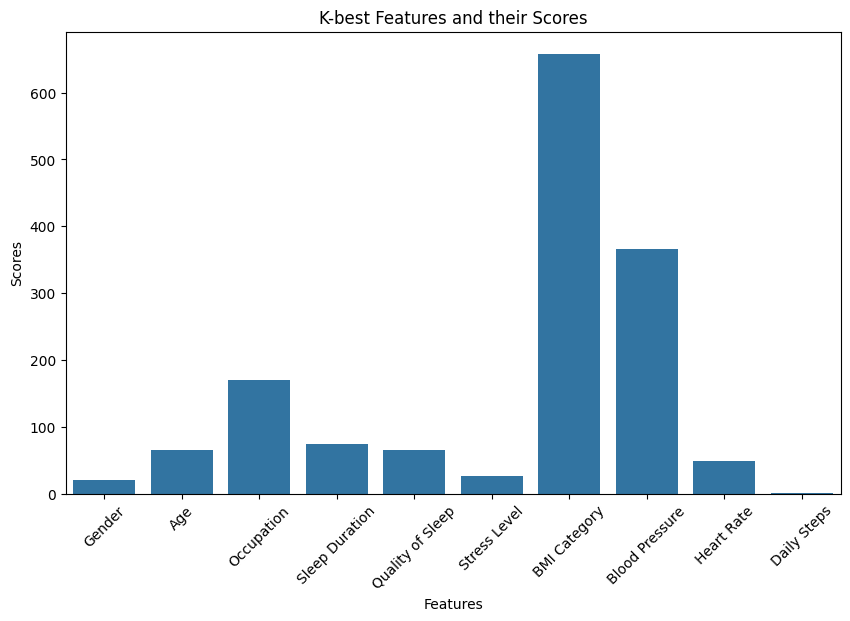

In [37]:
# Plot the K-best features and their scores
plt.figure(figsize=(10, 6))
sns.barplot(x=selected_features, y=selected_scores)
plt.title('K-best Features and their Scores')
plt.xlabel('Features')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.show()

In [38]:
# Save the feature selector
with open('k_best_selector.pkl', 'wb') as f:
    pickle.dump(k_best, f)

In [39]:
# Define the models
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'ANN': MLPClassifier(max_iter=300)
}

# Function to train and evaluate models
def train_evaluate_models(models, X_train, X_test, y_train, y_test, suffix=''):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
        print(f'{name} Accuracy{suffix}: {accuracy:.4f}')
        print(classification_report(y_test, y_pred))
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'{name} Confusion Matrix{suffix}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
        # Save the model
        with open(f'{name}_model{suffix}.pkl', 'wb') as f:
            pickle.dump(model, f)
    return results

Model Performance without Feature Selection:
KNN Accuracy_original: 0.9205
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        46
           1       0.93      0.90      0.92        42

    accuracy                           0.92        88
   macro avg       0.92      0.92      0.92        88
weighted avg       0.92      0.92      0.92        88



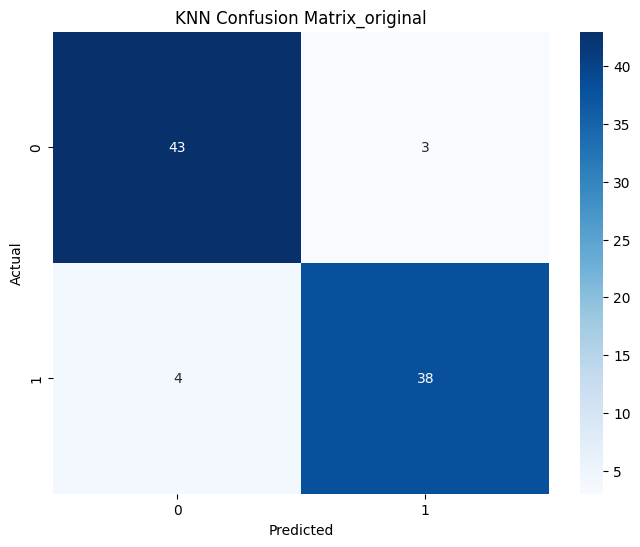

SVM Accuracy_original: 0.9432
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        46
           1       0.97      0.90      0.94        42

    accuracy                           0.94        88
   macro avg       0.95      0.94      0.94        88
weighted avg       0.95      0.94      0.94        88



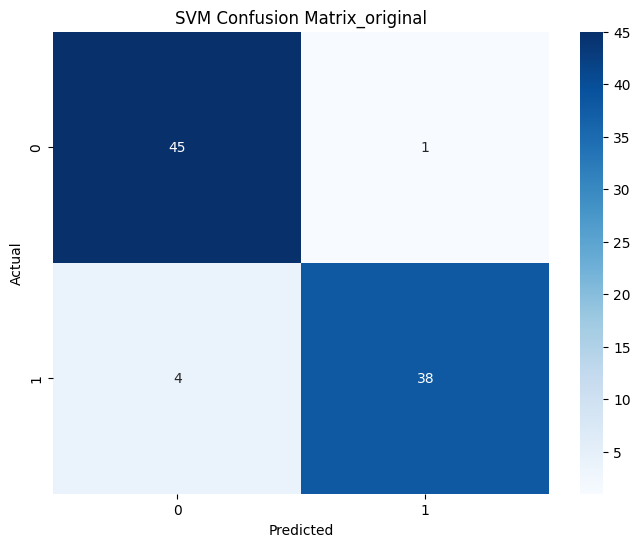

Decision Tree Accuracy_original: 0.9091
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        46
           1       0.97      0.83      0.90        42

    accuracy                           0.91        88
   macro avg       0.92      0.91      0.91        88
weighted avg       0.92      0.91      0.91        88



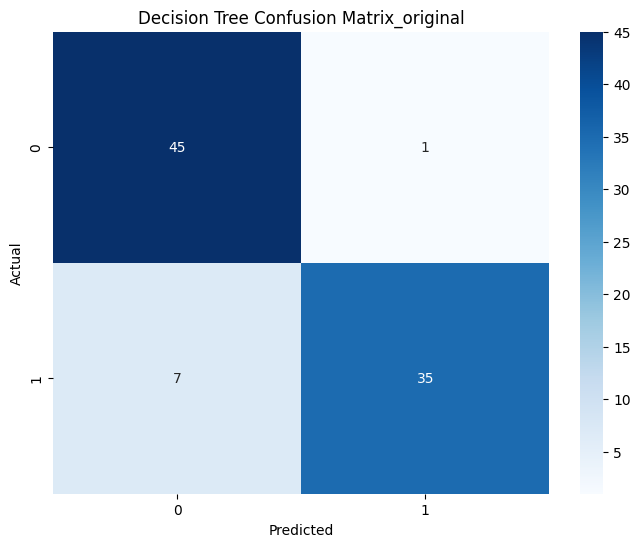

Random Forest Accuracy_original: 0.9432
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        46
           1       0.97      0.90      0.94        42

    accuracy                           0.94        88
   macro avg       0.95      0.94      0.94        88
weighted avg       0.95      0.94      0.94        88



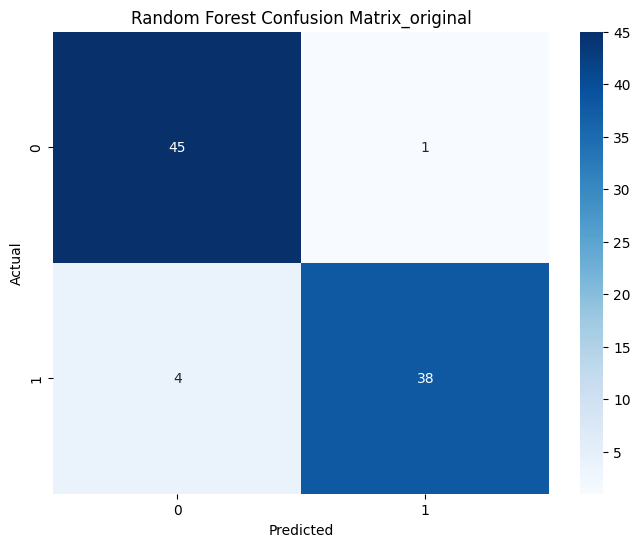

ANN Accuracy_original: 0.9432
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        46
           1       0.97      0.90      0.94        42

    accuracy                           0.94        88
   macro avg       0.95      0.94      0.94        88
weighted avg       0.95      0.94      0.94        88



C:\Users\0871\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


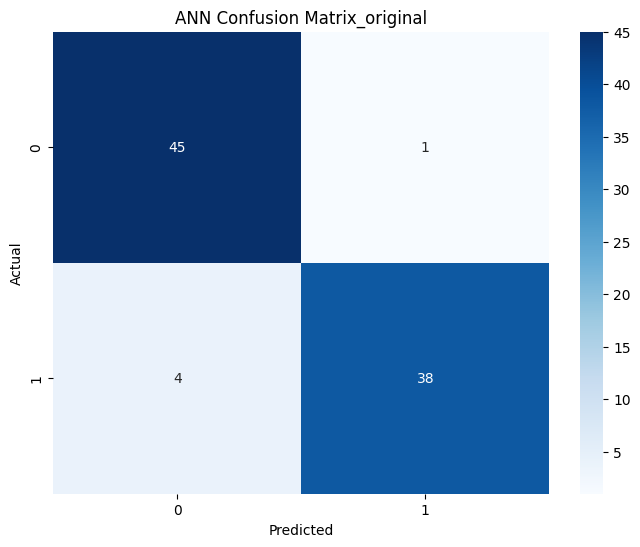

In [40]:
# Train and evaluate models on the original dataset
print("Model Performance without Feature Selection:")
results_without_fs = train_evaluate_models(models, X_train, X_test, y_train, y_test, suffix='_original')


Model Performance with K-best Feature Selection:
KNN Accuracy_k_best: 0.9205
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        46
           1       0.93      0.90      0.92        42

    accuracy                           0.92        88
   macro avg       0.92      0.92      0.92        88
weighted avg       0.92      0.92      0.92        88



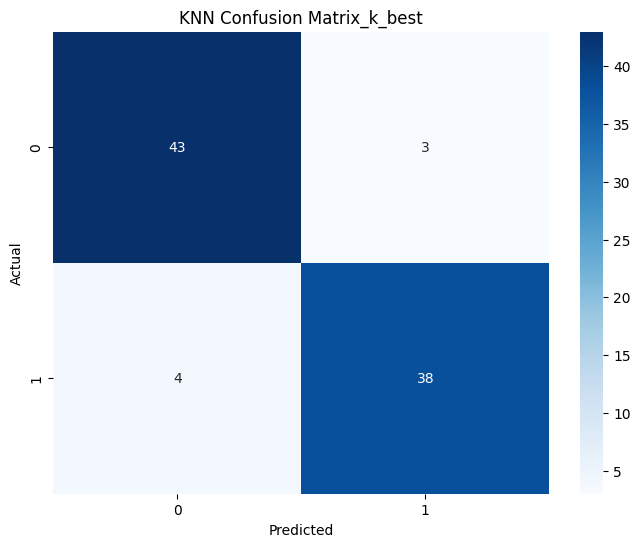

SVM Accuracy_k_best: 0.9432
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        46
           1       0.97      0.90      0.94        42

    accuracy                           0.94        88
   macro avg       0.95      0.94      0.94        88
weighted avg       0.95      0.94      0.94        88



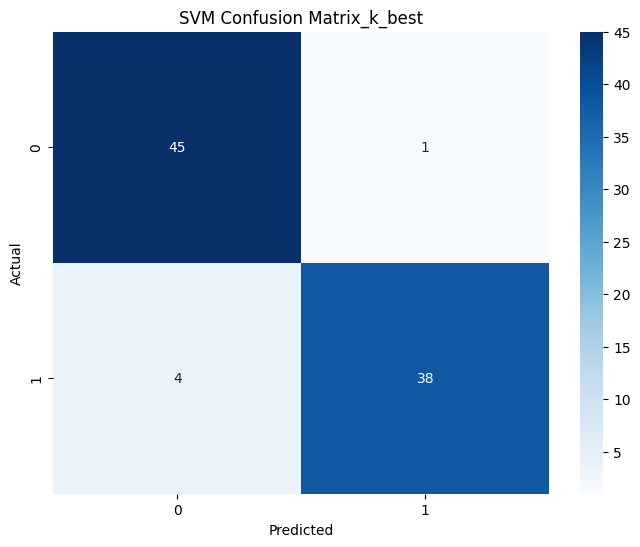

Decision Tree Accuracy_k_best: 0.9091
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        46
           1       0.97      0.83      0.90        42

    accuracy                           0.91        88
   macro avg       0.92      0.91      0.91        88
weighted avg       0.92      0.91      0.91        88



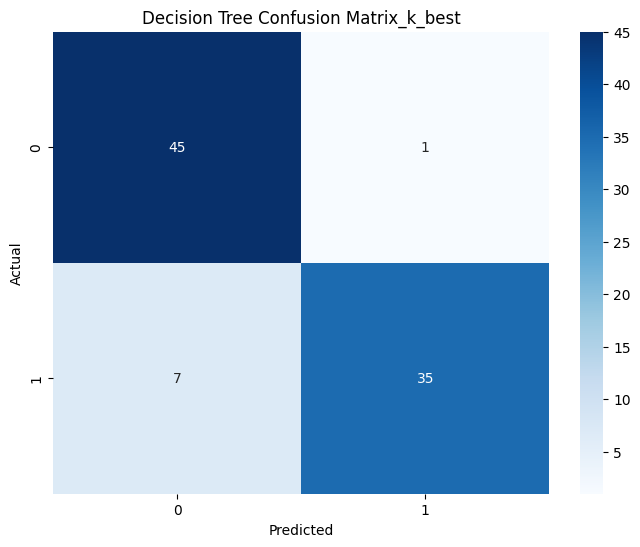

Random Forest Accuracy_k_best: 0.9432
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        46
           1       0.97      0.90      0.94        42

    accuracy                           0.94        88
   macro avg       0.95      0.94      0.94        88
weighted avg       0.95      0.94      0.94        88



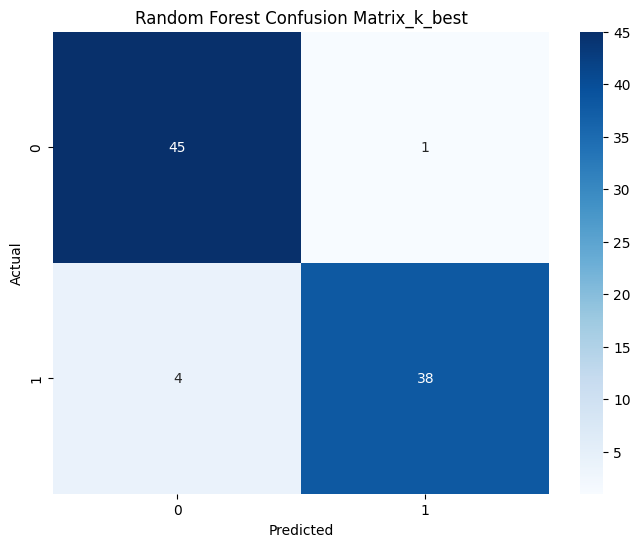

ANN Accuracy_k_best: 0.9432
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        46
           1       0.97      0.90      0.94        42

    accuracy                           0.94        88
   macro avg       0.95      0.94      0.94        88
weighted avg       0.95      0.94      0.94        88



C:\Users\0871\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


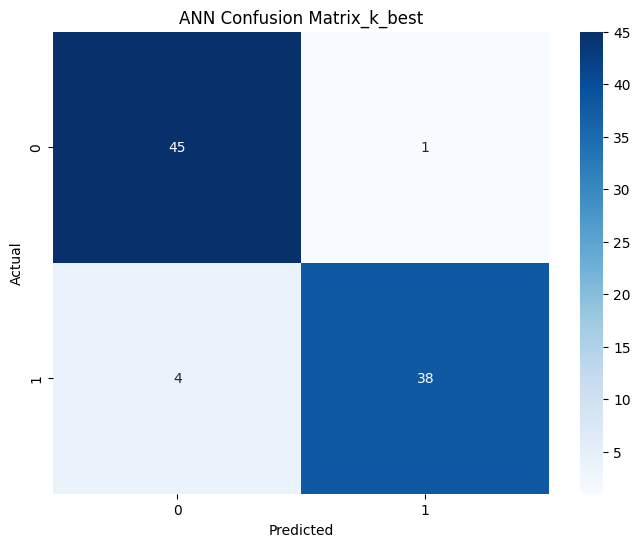

In [41]:

# Train and evaluate models on the dataset with selected K-best features
print("Model Performance with K-best Feature Selection:")
results_with_fs = train_evaluate_models(models, X_train_k_best, X_test_k_best, y_train, y_test, suffix='_k_best')


In [42]:
# Define the stacking and voting classifiers
estimators = [
    ('knn', KNeighborsClassifier()),
    ('svm', SVC(probability=True)),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier())
]

In [43]:
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=MLPClassifier(max_iter=300))
voting_clf = VotingClassifier(estimators=estimators, voting='soft')

Stacking and Voting Classifier Performance without Feature Selection:
Staking Classifier Accuracy without Feature Selection: 0.9432
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        46
           1       0.97      0.90      0.94        42

    accuracy                           0.94        88
   macro avg       0.95      0.94      0.94        88
weighted avg       0.95      0.94      0.94        88



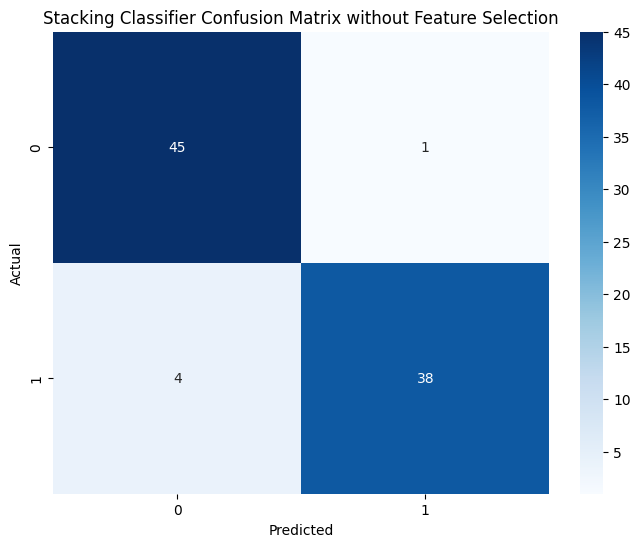

In [45]:
# Train and evaluate proposed models with and without feature selection
print("Stacking and Voting Classifier Performance without Feature Selection:")
stacking_clf.fit(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_test)
print(f'Staking Classifier Accuracy without Feature Selection: {accuracy_score(y_test, y_pred_stacking):.4f}')
print(classification_report(y_test, y_pred_stacking))
cm_stacking = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_stacking, annot=True, fmt='d', cmap='Blues')
plt.title('Stacking Classifier Confusion Matrix without Feature Selection')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [46]:
with open('stacking_classifier_original.pkl', 'wb') as f:
    pickle.dump(stacking_clf, f)


Voting Classifier Accuracy without Feature Selection: 0.9432
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        46
           1       0.97      0.90      0.94        42

    accuracy                           0.94        88
   macro avg       0.95      0.94      0.94        88
weighted avg       0.95      0.94      0.94        88



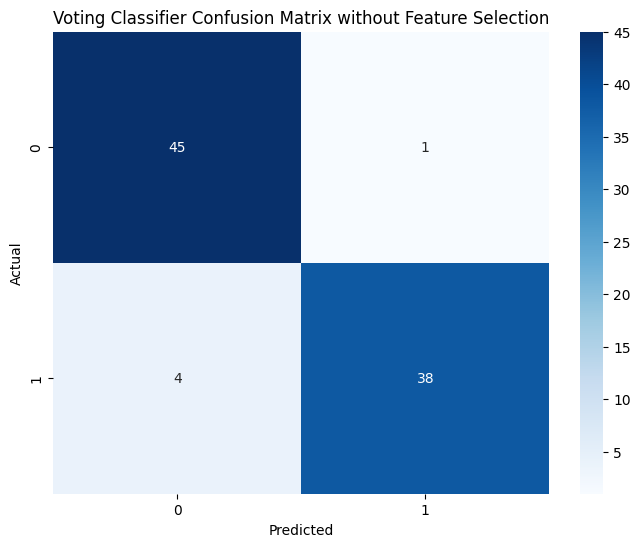

In [47]:
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
print(f'Voting Classifier Accuracy without Feature Selection: {accuracy_score(y_test, y_pred_voting):.4f}')
print(classification_report(y_test, y_pred_voting))
cm_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_voting, annot=True, fmt='d', cmap='Blues')
plt.title('Voting Classifier Confusion Matrix without Feature Selection')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [48]:
with open('voting_classifier_original.pkl', 'wb') as f:
    pickle.dump(voting_clf, f)

Stacking and Voting Classifier Performance with K-best Feature Selection:
Staking Classifier Accuracy with K-best Feature Selection: 0.9432
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        46
           1       0.97      0.90      0.94        42

    accuracy                           0.94        88
   macro avg       0.95      0.94      0.94        88
weighted avg       0.95      0.94      0.94        88



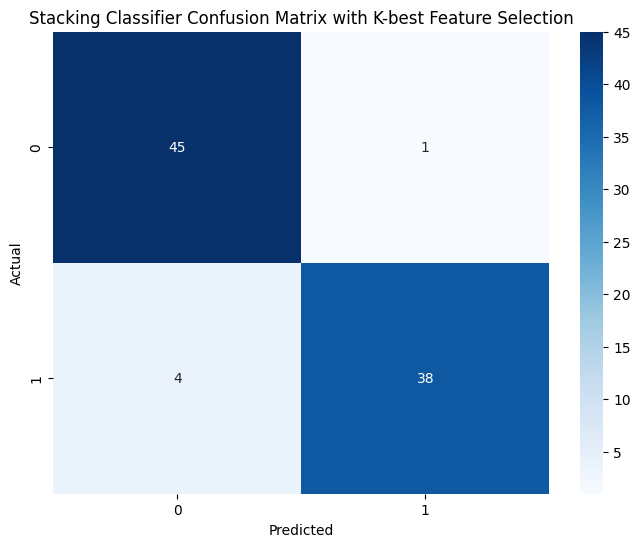

In [49]:
print("Stacking and Voting Classifier Performance with K-best Feature Selection:")
stacking_clf.fit(X_train_k_best, y_train)
y_pred_stacking_k_best = stacking_clf.predict(X_test_k_best)
print(f'Staking Classifier Accuracy with K-best Feature Selection: {accuracy_score(y_test, y_pred_stacking_k_best):.4f}')
print(classification_report(y_test, y_pred_stacking_k_best))
cm_stacking_k_best = confusion_matrix(y_test, y_pred_stacking_k_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_stacking_k_best, annot=True, fmt='d', cmap='Blues')
plt.title('Stacking Classifier Confusion Matrix with K-best Feature Selection')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [50]:
with open('stacking_classifier_k_best.pkl', 'wb') as f:
    pickle.dump(stacking_clf, f)

Voting Classifier Accuracy with K-best Feature Selection: 0.9432
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        46
           1       0.97      0.90      0.94        42

    accuracy                           0.94        88
   macro avg       0.95      0.94      0.94        88
weighted avg       0.95      0.94      0.94        88



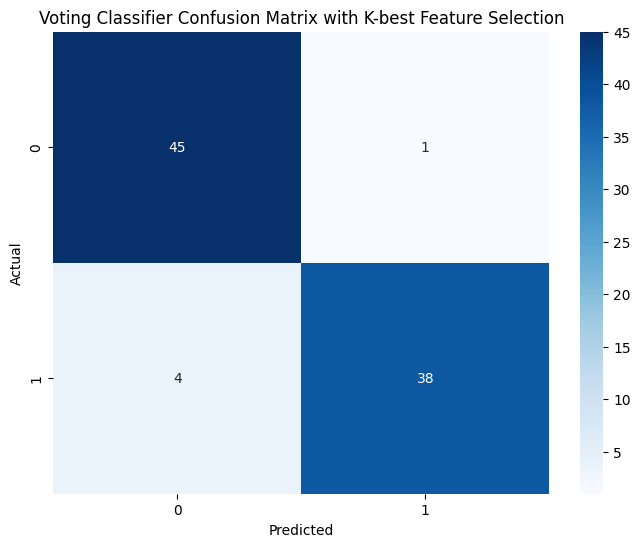

In [51]:
voting_clf.fit(X_train_k_best, y_train)
y_pred_voting_k_best = voting_clf.predict(X_test_k_best)
print(f'Voting Classifier Accuracy with K-best Feature Selection: {accuracy_score(y_test, y_pred_voting_k_best):.4f}')
print(classification_report(y_test, y_pred_voting_k_best))
cm_voting_k_best = confusion_matrix(y_test, y_pred_voting_k_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_voting_k_best, annot=True, fmt='d', cmap='Blues')
plt.title('Voting Classifier Confusion Matrix with K-best Feature Selection')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [52]:
with open('voting_classifier_k_best.pkl', 'wb') as f:
    pickle.dump(voting_clf, f)

In [54]:
# Compare model performance
comparison_df = pd.DataFrame({
    'Model': models.keys(),
    'Accuracy without FS': list(results_without_fs.values()),
    'Accuracy with K-best FS': list(results_with_fs.values())
})
print("\nModel Performance Comparison:")
print(comparison_df)



Model Performance Comparison:
           Model  Accuracy without FS  Accuracy with K-best FS
0            KNN             0.920455                 0.920455
1            SVM             0.943182                 0.943182
2  Decision Tree             0.909091                 0.909091
3  Random Forest             0.943182                 0.943182
4            ANN             0.943182                 0.943182


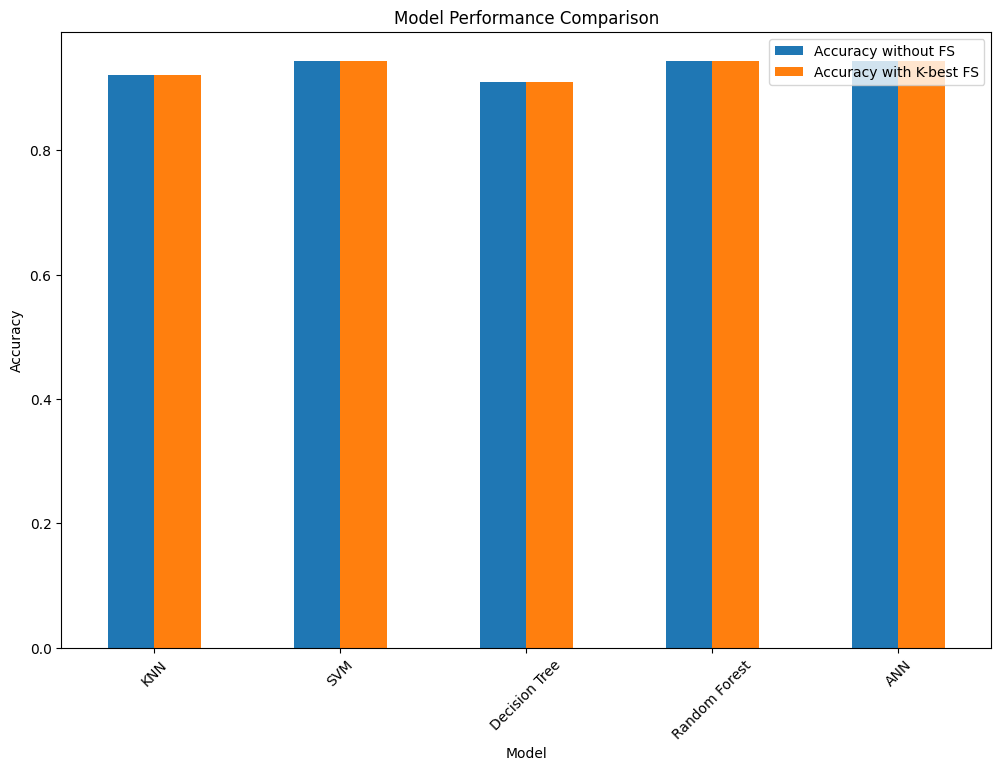

In [55]:
# Plot comparison
comparison_df.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()